# Part I - Registered Voter Participation in Union County, NC

## Merge, Scrub, and Initial Exploration of Voter Registration and History Data

<font size=4rem>
    
- **[Introduction](#Introduction)<br>**

- **[Obtain](#Obtain)**<br>

- **[Scrub and Explore](#scrub_explore)**<br>

    - **[Voter Registration and History](#vote_reg_his)**<br>

    - **[Major Elections](#maj_elec)**<br>

</font>

# Introduction

# Obtain

In [1]:
## Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

## Import functions made specifically for this project
from capstone_functions import *

In [3]:
## Set options for displaying Pandas DataFrames
pd.options.display.max_columns = 100
pd.options.display.max_rows = 120

In [4]:
## Load in voter registration data for Union County
uc_vreg = pd.read_table('Data/ncvoter90_Jan4.zip', encoding='ISO-8859-1')
uc_vreg.head()

,county_id,county_desc,voter_reg_num,status_cd,voter_status_desc,reason_cd,voter_status_reason_desc,absent_ind,name_prefx_cd,last_name,first_name,middle_name,name_suffix_lbl,res_street_address,res_city_desc,state_cd,zip_code,mail_addr1,mail_addr2,mail_addr3,mail_addr4,mail_city,mail_state,mail_zipcode,full_phone_number,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,precinct_desc,municipality_abbrv,municipality_desc,ward_abbrv,ward_desc,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,county_commiss_abbrv,county_commiss_desc,township_abbrv,township_desc,school_dist_abbrv,school_dist_desc,fire_dist_abbrv,fire_dist_desc,water_dist_abbrv,water_dist_desc,sewer_dist_abbrv,sewer_dist_desc,sanit_dist_abbrv,sanit_dist_desc,rescue_dist_abbrv,rescue_dist_desc,munic_dist_abbrv,munic_dist_desc,dist_1_abbrv,dist_1_desc,dist_2_abbrv,dist_2_desc,confidential_ind,birth_year,ncid,vtd_abbrv,vtd_desc
0,90,UNION,346446,A,ACTIVE,AV,VERIFIED,,,AALAEI,ARIO,NaN,NaN,4009 MILLBRIDGE PKWY,WAXHAW,NC,28173.0,4009 MILLBRIDGE PKWY,NaN,NaN,NaN,WAXHAW,NC,28173,NaN,W,NL,UNA,M,47,OC,Y,04/25/2019,020A,020A,5.0,WAXHAW,NaN,NaN,9.0,20B,20C,35.0,68.0,NaN,NaN,NaN,NaN,2.0,SCHOOL #2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,WAXHAW,30.0,30TH PROSECUTORIAL,,,N,1974,EF230133,020A,020A
1,90,UNION,348004,A,ACTIVE,AV,VERIFIED,,,AALAEI,KAVITHA,NaN,NaN,4009 MILLBRIDGE PKWY,WAXHAW,NC,28173.0,4009 MILLBRIDGE PKWY,NaN,NaN,NaN,WAXHAW,NC,28173,NaN,A,NL,DEM,F,47,OC,Y,06/24/2019,020A,020A,5.0,WAXHAW,NaN,NaN,9.0,20B,20C,35.0,68.0,NaN,NaN,NaN,NaN,2.0,SCHOOL #2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,WAXHAW,30.0,30TH PROSECUTORIAL,,,N,1974,EF231096,020A,020A
2,90,UNION,281016,A,ACTIVE,AV,VERIFIED,,,AALBORG,ALEXIS,LEANN,NaN,1001 STEVENS PRIDE CT,INDIAN TRAIL,NC,28079.0,1001 STEVENS PRIDE CT,NaN,NaN,NaN,INDIAN TRAIL,NC,28079,NaN,W,NL,UNA,F,27,IA,Y,11/04/2013,029A,029A,6.0,INDIAN TRAIL,NaN,NaN,9.0,20B,20C,35.0,68.0,NaN,NaN,NaN,NaN,3.0,SCHOOL #3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,INDIAN TRAIL,30.0,30TH PROSECUTORIAL,,,N,1994,AL261840,029A,029A
3,90,UNION,288489,A,ACTIVE,AV,VERIFIED,,,AALBORG,BRYAN,LEE,NaN,1001 STEVENS PRIDE CT,INDIAN TRAIL,NC,28079.0,1001 STEVENS PRIDE CT,NaN,NaN,NaN,INDIAN TRAIL,NC,28079,NaN,W,UN,UNA,M,63,OK,Y,09/17/2014,029A,029A,6.0,INDIAN TRAIL,NaN,NaN,9.0,20B,20C,35.0,68.0,NaN,NaN,NaN,NaN,3.0,SCHOOL #3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,INDIAN TRAIL,30.0,30TH PROSECUTORIAL,,,N,1958,AL178177,029A,029A
4,90,UNION,279308,A,ACTIVE,AV,VERIFIED,,,AALBORG,SHARON,SCHLEENBAKER,NaN,1001 STEVENS PRIDE CT,INDIAN TRAIL,NC,28079.0,1001 STEVENS PRIDE CT,NaN,NaN,NaN,INDIAN TRAIL,NC,28079,NaN,W,NL,REP,F,63,PA,Y,07/24/2013,029A,029A,6.0,INDIAN TRAIL,NaN,NaN,9.0,20B,20C,35.0,68.0,NaN,NaN,NaN,NaN,3.0,SCHOOL #3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,INDIAN TRAIL,30.0,30TH PROSECUTORIAL,,,N,1958,AL193958,029A,029A


In [5]:
## Load in voter history data for Union County
uc_vhis = pd.read_table('Data/ncvhis90_Jan4.zip')
uc_vhis.head()

,county_id,county_desc,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,voted_party_desc,pct_label,pct_description,ncid,voted_county_id,voted_county_desc,vtd_label,vtd_description
0,90,UNION,285297,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,REPUBLICAN,016,016,AA100547,90,UNION,016,016
1,90,UNION,285297,09/10/2019,09/10/2019 GENERAL,ABSENTEE ONESTOP,REP,REPUBLICAN,016,016,AA100547,90,UNION,016,016
2,90,UNION,285297,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,REPUBLICAN,016,016,AA100547,90,UNION,016,016
3,90,UNION,285297,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,REPUBLICAN,016,016,AA100547,90,UNION,016,016
4,90,UNION,285297,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,REPUBLICAN,016,016,AA100547,90,UNION,016,016


<a id='scrub_explore'></a>
# Scrub and Explore

<a id='vote_reg_his'></a>
## Vote Registration and History

In [6]:
## Check metadata for voter registration dataframe
uc_vreg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185008 entries, 0 to 185007
Data columns (total 71 columns):
county_id                   185008 non-null int64
county_desc                 185008 non-null object
voter_reg_num               185008 non-null int64
status_cd                   185008 non-null object
voter_status_desc           185008 non-null object
reason_cd                   185008 non-null object
voter_status_reason_desc    185008 non-null object
absent_ind                  185008 non-null object
name_prefx_cd               185008 non-null object
last_name                   185004 non-null object
first_name                  185005 non-null object
middle_name                 169910 non-null object
name_suffix_lbl             21203 non-null object
res_street_address          185008 non-null object
res_city_desc               171451 non-null object
state_cd                    171451 non-null object
zip_code                    171451 non-null float64
mail_addr1              

In [7]:
## Check metadata for voter history dataframe
uc_vhis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807296 entries, 0 to 807295
Data columns (total 15 columns):
county_id            807296 non-null int64
county_desc          807296 non-null object
voter_reg_num        807296 non-null int64
election_lbl         807296 non-null object
election_desc        807296 non-null object
voting_method        807296 non-null object
voted_party_cd       807232 non-null object
voted_party_desc     807232 non-null object
pct_label            807296 non-null object
pct_description      807296 non-null object
ncid                 807296 non-null object
voted_county_id      807296 non-null int64
voted_county_desc    807296 non-null object
vtd_label            807118 non-null object
vtd_description      807118 non-null object
dtypes: int64(3), object(12)
memory usage: 92.4+ MB


### Explore Duplicate Records

In [8]:
## Check for duplicate entries in voter registration data
uc_vreg.duplicated().sum()

0

In [9]:
## Check for duplicate entries in voter history data
uc_vhis.duplicated().sum()

134

In [10]:
## Inspect duplicate entries in voter history data
exact_dup_vhis = uc_vhis.loc[uc_vhis.duplicated()]
exact_dup_vhis

,county_id,county_desc,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,voted_party_desc,pct_label,pct_description,ncid,voted_county_id,voted_county_desc,vtd_label,vtd_description
9068,90,UNION,325228,09/10/2019,09/10/2019 GENERAL,IN-PERSON,DEM,DEMOCRATIC,020A,020A,AN168178,90,UNION,020A,020A
9069,90,UNION,325228,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,DEMOCRATIC,020A,020A,AN168178,90,UNION,020A,020A
26484,90,UNION,205258,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,UNAFFILIATED,029C,029C,CE19807,90,UNION,029C,029C
36111,90,UNION,338757,11/06/2018,11/06/2018 GENERAL,PROVISIONAL,REP,REPUBLICAN,037A,037A,CW1070559,90,UNION,037A,037A
75412,90,UNION,204911,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,DEMOCRATIC,036,036,CW455149,90,UNION,036,036
75414,90,UNION,204911,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,DEMOCRATIC,036,036,CW455149,90,UNION,036,036
86295,90,UNION,222835,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,REPUBLICAN,020A,020A,CW538362,90,UNION,020A,020A
86296,90,UNION,222835,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,REPUBLICAN,020A,020A,CW538362,90,UNION,020A,020A
133106,90,UNION,312964,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,REPUBLICAN,037A,037A,CW868146,90,UNION,037A,037A
163993,90,UNION,178227,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,REPUBLICAN,038A,038A,EF101585,90,UNION,038A,038A


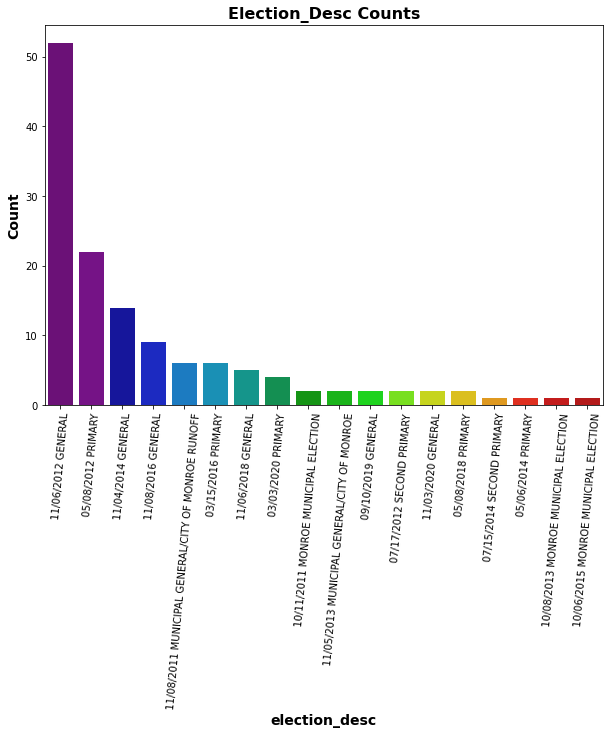

In [11]:
plot_count('election_desc', exact_dup_vhis, rotation=85);

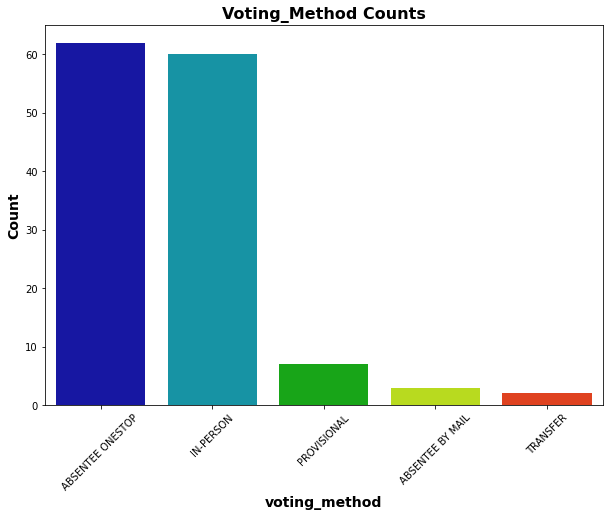

In [12]:
plot_count('voting_method', exact_dup_vhis, rotation=45);

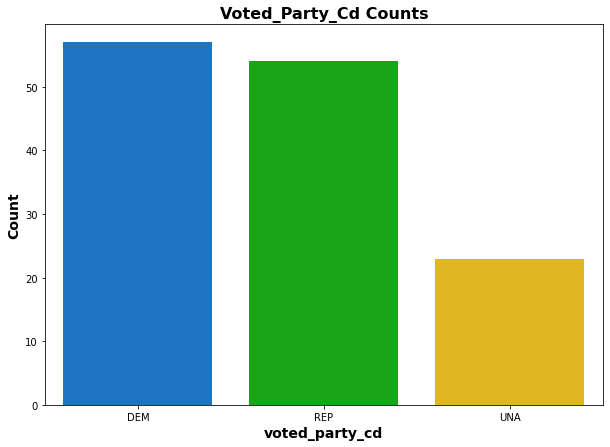

In [13]:
plot_count('voted_party_cd', exact_dup_vhis);

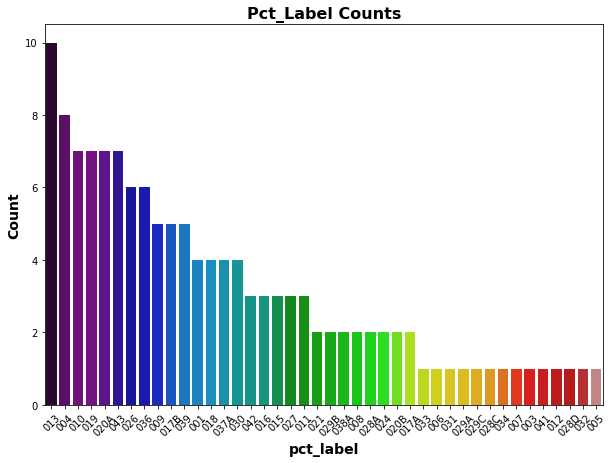

In [14]:
plot_count('pct_label', exact_dup_vhis, rotation=45);

In [15]:
## Remove exact duplicate entries from records of voter history
uc_vhis.drop_duplicates(inplace=True)

In [16]:
## There are 9 instances where an ncid shows up as casting a vote
  ## more than once in the same election where the records aren't exact copies
uc_vhis.duplicated(subset=['ncid','election_desc']).sum()

9

In [17]:
## A total of 7 individuals show up more than once for a single election
dup_ncid_elecs = uc_vhis.loc[uc_vhis.duplicated(subset=['ncid', 'election_desc'], keep=False)]
display(dup_ncid_elecs.head())
dup_ncid_elecs['ncid'].nunique()

,county_id,county_desc,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,voted_party_desc,pct_label,pct_description,ncid,voted_county_id,voted_county_desc,vtd_label,vtd_description
31488,90,UNION,338735,11/06/2018,11/06/2018 GENERAL,PROVISIONAL,REP,REPUBLICAN,020B,020B,CW1012090,90,UNION,020B,020B
31492,90,UNION,338735,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,REPUBLICAN,058,PCT 058,CW1012090,60,MECKLENBURG,058,058
149121,90,UNION,364740,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,UNAFFILIATED,W16,W16,DB153036,65,NEW HANOVER,W16,W16
149122,90,UNION,364740,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,UNAFFILIATED,W25,W25,DB153036,65,NEW HANOVER,W25,W25
149123,90,UNION,364740,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,DEMOCRATIC,W16,W16,DB153036,65,NEW HANOVER,W16,W16


7

In [18]:
## Examine the complete recent voting history of the 7 ncid's that show up 
  ## multiple times for a single election to investigate how the records differ
for ncid in dup_ncid_elecs['ncid'].unique():
    display(uc_vhis.loc[uc_vhis['ncid']==ncid].sort_values(['election_desc']))

,county_id,county_desc,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,voted_party_desc,pct_label,pct_description,ncid,voted_county_id,voted_county_desc,vtd_label,vtd_description
31487,90,UNION,338735,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,REP,REPUBLICAN,020B,020B,CW1012090,90,UNION,020B,020B
31490,90,UNION,338735,09/10/2019,09/10/2019 GENERAL,IN-PERSON,REP,REPUBLICAN,020B,020B,CW1012090,90,UNION,020B,020B
31495,90,UNION,338735,11/03/2015,11/03/2015 GENERAL,IN-PERSON,REP,REPUBLICAN,058,PCT 058,CW1012090,60,MECKLENBURG,058,058
31489,90,UNION,338735,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,REPUBLICAN,020B,020B,CW1012090,90,UNION,020B,020B
31494,90,UNION,338735,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,REPUBLICAN,148,PCT 148,CW1012090,60,MECKLENBURG,148,148
31491,90,UNION,338735,11/05/2019,11/05/2019 MUNICIPAL,IN-PERSON,REP,REPUBLICAN,020B,020B,CW1012090,90,UNION,020B,020B
31488,90,UNION,338735,11/06/2018,11/06/2018 GENERAL,PROVISIONAL,REP,REPUBLICAN,020B,020B,CW1012090,90,UNION,020B,020B
31492,90,UNION,338735,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,REPUBLICAN,058,PCT 058,CW1012090,60,MECKLENBURG,058,058
31493,90,UNION,338735,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,REPUBLICAN,058,PCT 058,CW1012090,60,MECKLENBURG,058,058


,county_id,county_desc,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,voted_party_desc,pct_label,pct_description,ncid,voted_county_id,voted_county_desc,vtd_label,vtd_description
149123,90,UNION,364740,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,DEMOCRATIC,W16,W16,DB153036,65,NEW HANOVER,W16,W16
149127,90,UNION,364740,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,REPUBLICAN,0070,SALEM,DB153036,12,BURKE,0070,0070
149125,90,UNION,364740,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,DEMOCRATIC,W25,W25,DB153036,65,NEW HANOVER,W25,W25
149126,90,UNION,364740,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,REPUBLICAN,020A,020A,DB153036,90,UNION,020A,020A
149120,90,UNION,364740,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,UNA,UNAFFILIATED,W16,W16,DB153036,65,NEW HANOVER,W16,W16
149122,90,UNION,364740,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,UNAFFILIATED,W25,W25,DB153036,65,NEW HANOVER,W25,W25
149128,90,UNION,364740,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,REPUBLICAN,0070,SALEM,DB153036,12,BURKE,0070,0070
149124,90,UNION,364740,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,UNAFFILIATED,CF02,CF02,DB153036,65,NEW HANOVER,CF02,CF02
149121,90,UNION,364740,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,UNAFFILIATED,W16,W16,DB153036,65,NEW HANOVER,W16,W16
149129,90,UNION,364740,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,REPUBLICAN,0070,SALEM,DB153036,12,BURKE,0070,0070


,county_id,county_desc,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,voted_party_desc,pct_label,pct_description,ncid,voted_county_id,voted_county_desc,vtd_label,vtd_description
371877,90,UNION,252400,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,DEMOCRATIC,028D,028D,EF164225,90,UNION,028,028
371873,90,UNION,252400,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,DEMOCRATIC,028D,028D,EF164225,90,UNION,028,028
371871,90,UNION,252400,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,DEMOCRATIC,028D,028D,EF164225,90,UNION,028,028
371879,90,UNION,252400,09/10/2019,09/10/2019 GENERAL,IN-PERSON,DEM,DEMOCRATIC,028D,028D,EF164225,90,UNION,028,028
371875,90,UNION,252400,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,DEMOCRATIC,028D,028D,EF164225,90,UNION,028,028
371876,90,UNION,252400,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,DEMOCRATIC,028D,028D,EF164225,90,UNION,028,028
371878,90,UNION,252400,11/05/2019,11/05/2019 MUNICIPAL,IN-PERSON,DEM,DEMOCRATIC,028D,028D,EF164225,90,UNION,028,028
371870,90,UNION,252400,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,DEMOCRATIC,028D,028D,EF164225,90,UNION,028,028
371874,90,UNION,252400,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,DEMOCRATIC,028D,028D,EF164225,90,UNION,028,028
371872,90,UNION,252400,11/07/2017,11/07/2017 MUNICIPAL,IN-PERSON,DEM,DEMOCRATIC,028D,028D,EF164225,90,UNION,028,028


,county_id,county_desc,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,voted_party_desc,pct_label,pct_description,ncid,voted_county_id,voted_county_desc,vtd_label,vtd_description
435242,90,UNION,307237,11/03/2020,11/03/2020 GENERAL,IN-PERSON,REP,REPUBLICAN,013,013,EF186914,90,UNION,013,013
435239,90,UNION,307237,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,REPUBLICAN,038A,038A,EF186914,90,UNION,038A,038A
435240,90,UNION,307237,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,REPUBLICAN,038A,038A,EF186914,90,UNION,038A,038A
435243,90,UNION,307237,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,UNAFFILIATED,CUL,CULLOWHEE,EF186914,50,JACKSON,CUL,CUL
435241,90,UNION,307237,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,REPUBLICAN,039,039,EF186914,90,UNION,039,039


,county_id,county_desc,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,voted_party_desc,pct_label,pct_description,ncid,voted_county_id,voted_county_desc,vtd_label,vtd_description
698002,90,UNION,144979,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,REP,REPUBLICAN,039,039,EF69085,90,UNION,039,039
698003,90,UNION,144979,09/10/2019,09/10/2019 GENERAL,IN-PERSON,REP,REPUBLICAN,039,039,EF69085,90,UNION,039,039
698006,90,UNION,144979,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,REPUBLICAN,039,039,EF69085,90,UNION,039,039
698004,90,UNION,144979,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,REPUBLICAN,039,039,EF69085,90,UNION,038A,038A
698007,90,UNION,144979,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,REPUBLICAN,039,039,EF69085,90,UNION,039,039
698005,90,UNION,144979,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,REPUBLICAN,039,039,EF69085,90,UNION,039,039
698001,90,UNION,144979,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,REPUBLICAN,039,039,EF69085,90,UNION,039,039


,county_id,county_desc,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,voted_party_desc,pct_label,pct_description,ncid,voted_county_id,voted_county_desc,vtd_label,vtd_description
728804,90,UNION,341724,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,REPUBLICAN,038A,038A,EF78820,90,UNION,038A,038A
728803,90,UNION,341724,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,REPUBLICAN,029A,029A,EF78820,90,UNION,029A,029A
728805,90,UNION,341724,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,REPUBLICAN,11-01,11-01,EF78820,13,CABARRUS,11-01,11-01


,county_id,county_desc,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,voted_party_desc,pct_label,pct_description,ncid,voted_county_id,voted_county_desc,vtd_label,vtd_description
777893,90,UNION,272193,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,DEMOCRATIC,BURN,BURNSVILLE,EF93894,4,ANSON,BURN,BURN
777894,90,UNION,272193,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,DEMOCRATIC,009,009,EF93894,90,UNION,009,009


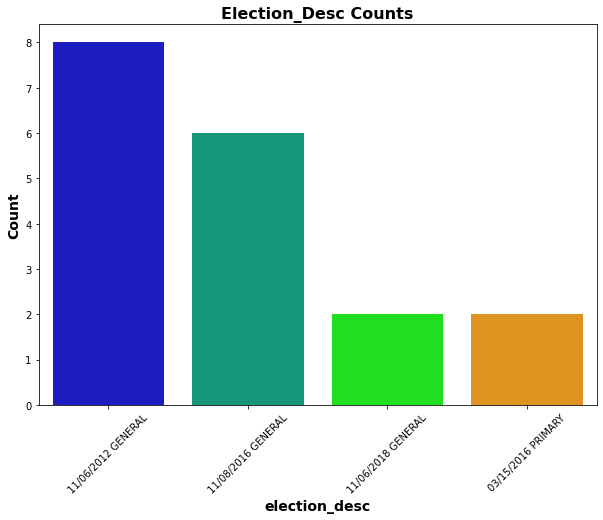

In [19]:
plot_count('election_desc', dup_ncid_elecs, rotation=45);

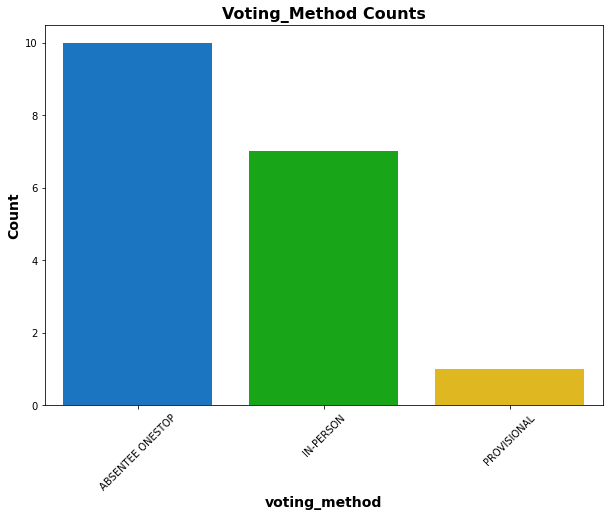

In [20]:
plot_count('voting_method', dup_ncid_elecs, rotation=45);

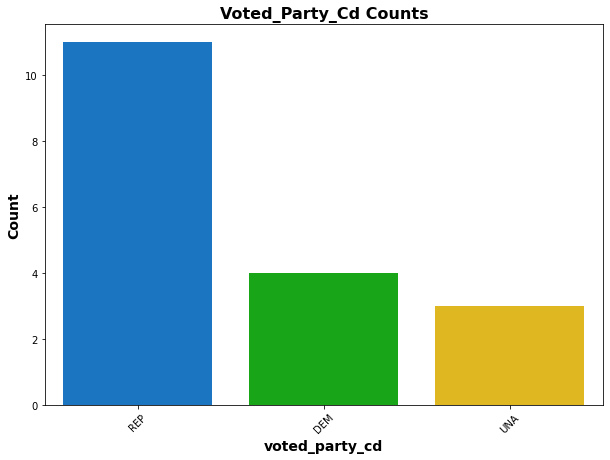

In [21]:
plot_count('voted_party_cd', dup_ncid_elecs, rotation=45);

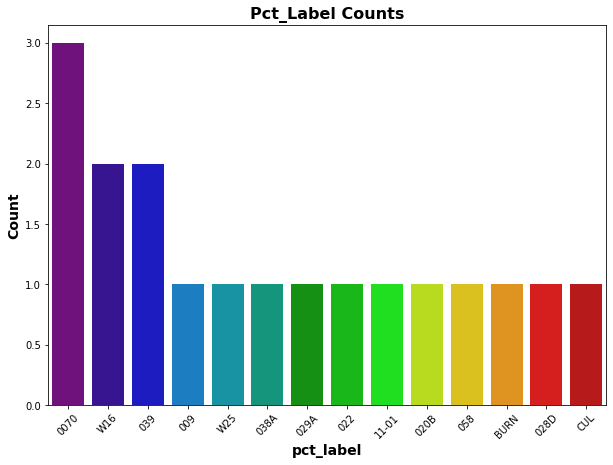

In [22]:
plot_count('pct_label', dup_ncid_elecs, rotation=45);

### Explore Voter Registration Records

In [23]:
## Check number of unique individuals represented in voter reg records
uc_vreg['ncid'].nunique()

185008

In [24]:
## Check voter status information -- Should any categories be removed??
uc_vreg['voter_status_desc'].value_counts()

ACTIVE       155227
INACTIVE      14748
REMOVED       13554
DENIED         1356
TEMPORARY       123
Name: voter_status_desc, dtype: int64

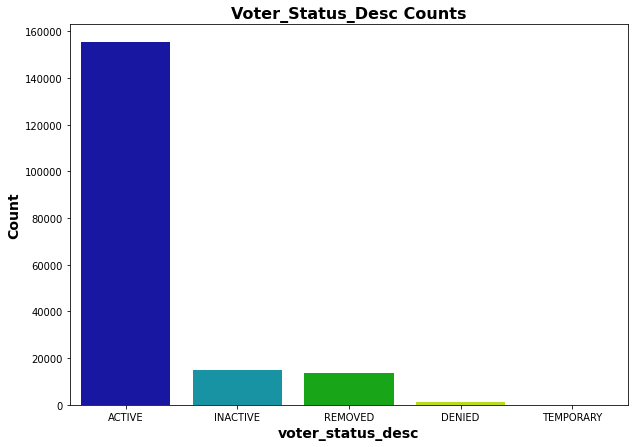

In [25]:
plot_count('voter_status_desc', uc_vreg);

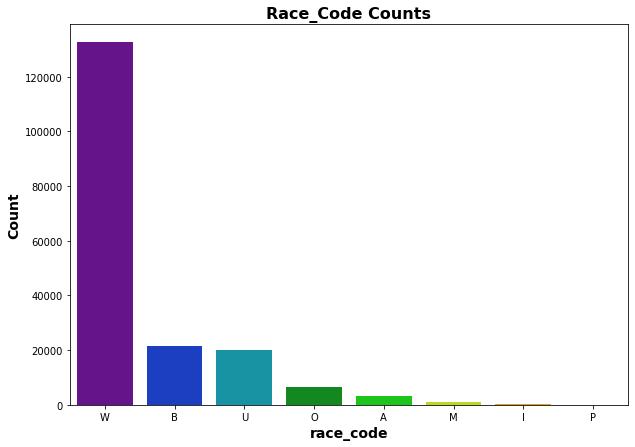

In [26]:
plot_count('race_code', uc_vreg);

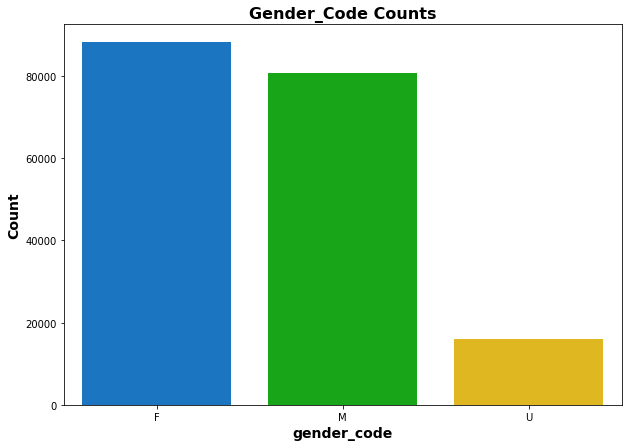

In [27]:
plot_count('gender_code', uc_vreg);

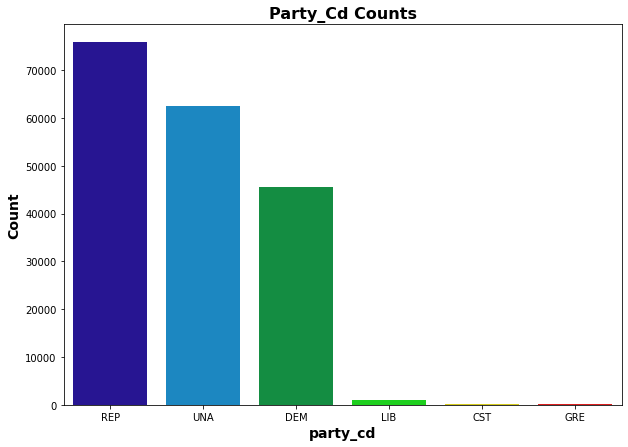

In [28]:
plot_count('party_cd', uc_vreg); # registered party

In [29]:
uc_vreg['birth_year'].min()

1907

In [30]:
uc_vreg['birth_year'].sort_values()[:10]

1488      1907
176595    1910
154566    1912
157817    1912
65965     1912
70429     1912
55363     1913
55299     1913
111685    1913
149172    1913
Name: birth_year, dtype: int64

Text(0, 0.5, 'Count')

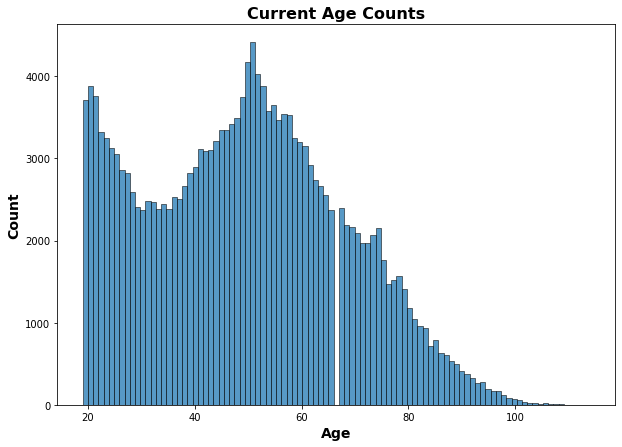

In [31]:
## Plot distribution of current age as of EOY 2020 
  ## Note that the birth_age column in uc_vreg is specific to the date that
    ## individual registered to vote, so not reflective of current age
plt.figure(figsize=(10,7))
ax = sns.histplot(uc_vreg['birth_age'])
ax.set_title('Current Age Counts', fontsize=16, weight='bold')
ax.set_xlabel('Age', fontsize=14, weight='bold')
ax.set_ylabel('Count', fontsize=14, weight='bold')

In [32]:
uc_vreg.loc[uc_vreg['birth_state']=='NO']

,county_id,county_desc,voter_reg_num,status_cd,voter_status_desc,reason_cd,voter_status_reason_desc,absent_ind,name_prefx_cd,last_name,first_name,middle_name,name_suffix_lbl,res_street_address,res_city_desc,state_cd,zip_code,mail_addr1,mail_addr2,mail_addr3,mail_addr4,mail_city,mail_state,mail_zipcode,full_phone_number,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,precinct_desc,municipality_abbrv,municipality_desc,ward_abbrv,ward_desc,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,county_commiss_abbrv,county_commiss_desc,township_abbrv,township_desc,school_dist_abbrv,school_dist_desc,fire_dist_abbrv,fire_dist_desc,water_dist_abbrv,water_dist_desc,sewer_dist_abbrv,sewer_dist_desc,sanit_dist_abbrv,sanit_dist_desc,rescue_dist_abbrv,rescue_dist_desc,munic_dist_abbrv,munic_dist_desc,dist_1_abbrv,dist_1_desc,dist_2_abbrv,dist_2_desc,confidential_ind,birth_year,ncid,vtd_abbrv,vtd_desc
76417,90,UNION,260882,A,ACTIVE,AV,VERIFIED,,,HOLSHOUSER,HUNTER,SCOTT,NaN,517 W BRIEF RD,INDIAN TRAIL,NC,28079.0,517 W BRIEF RD,NaN,NaN,NaN,INDIAN TRAIL,NC,28079,NaN,W,NL,REP,M,27,NO,Y,05/18/2010,032,032,93.0,FAIRVIEW,NaN,NaN,9.0,20B,20C,36.0,69.0,NaN,NaN,NaN,NaN,4.0,SCHOOL #4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0,FAIRVIEW,30.0,30TH PROSECUTORIAL,,,N,1994,EF171044,032,032


### Active Voters

In [33]:
active_voters = uc_vreg.groupby('voter_status_desc').get_group('ACTIVE')
print(len(active_voters))
active_voters.head()

155227


,county_id,county_desc,voter_reg_num,status_cd,voter_status_desc,reason_cd,voter_status_reason_desc,absent_ind,name_prefx_cd,last_name,first_name,middle_name,name_suffix_lbl,res_street_address,res_city_desc,state_cd,zip_code,mail_addr1,mail_addr2,mail_addr3,mail_addr4,mail_city,mail_state,mail_zipcode,full_phone_number,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,precinct_desc,municipality_abbrv,municipality_desc,ward_abbrv,ward_desc,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,county_commiss_abbrv,county_commiss_desc,township_abbrv,township_desc,school_dist_abbrv,school_dist_desc,fire_dist_abbrv,fire_dist_desc,water_dist_abbrv,water_dist_desc,sewer_dist_abbrv,sewer_dist_desc,sanit_dist_abbrv,sanit_dist_desc,rescue_dist_abbrv,rescue_dist_desc,munic_dist_abbrv,munic_dist_desc,dist_1_abbrv,dist_1_desc,dist_2_abbrv,dist_2_desc,confidential_ind,birth_year,ncid,vtd_abbrv,vtd_desc
0,90,UNION,346446,A,ACTIVE,AV,VERIFIED,,,AALAEI,ARIO,NaN,NaN,4009 MILLBRIDGE PKWY,WAXHAW,NC,28173.0,4009 MILLBRIDGE PKWY,NaN,NaN,NaN,WAXHAW,NC,28173,NaN,W,NL,UNA,M,47,OC,Y,04/25/2019,020A,020A,5.0,WAXHAW,NaN,NaN,9.0,20B,20C,35.0,68.0,NaN,NaN,NaN,NaN,2.0,SCHOOL #2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,WAXHAW,30.0,30TH PROSECUTORIAL,,,N,1974,EF230133,020A,020A
1,90,UNION,348004,A,ACTIVE,AV,VERIFIED,,,AALAEI,KAVITHA,NaN,NaN,4009 MILLBRIDGE PKWY,WAXHAW,NC,28173.0,4009 MILLBRIDGE PKWY,NaN,NaN,NaN,WAXHAW,NC,28173,NaN,A,NL,DEM,F,47,OC,Y,06/24/2019,020A,020A,5.0,WAXHAW,NaN,NaN,9.0,20B,20C,35.0,68.0,NaN,NaN,NaN,NaN,2.0,SCHOOL #2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,WAXHAW,30.0,30TH PROSECUTORIAL,,,N,1974,EF231096,020A,020A
2,90,UNION,281016,A,ACTIVE,AV,VERIFIED,,,AALBORG,ALEXIS,LEANN,NaN,1001 STEVENS PRIDE CT,INDIAN TRAIL,NC,28079.0,1001 STEVENS PRIDE CT,NaN,NaN,NaN,INDIAN TRAIL,NC,28079,NaN,W,NL,UNA,F,27,IA,Y,11/04/2013,029A,029A,6.0,INDIAN TRAIL,NaN,NaN,9.0,20B,20C,35.0,68.0,NaN,NaN,NaN,NaN,3.0,SCHOOL #3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,INDIAN TRAIL,30.0,30TH PROSECUTORIAL,,,N,1994,AL261840,029A,029A
3,90,UNION,288489,A,ACTIVE,AV,VERIFIED,,,AALBORG,BRYAN,LEE,NaN,1001 STEVENS PRIDE CT,INDIAN TRAIL,NC,28079.0,1001 STEVENS PRIDE CT,NaN,NaN,NaN,INDIAN TRAIL,NC,28079,NaN,W,UN,UNA,M,63,OK,Y,09/17/2014,029A,029A,6.0,INDIAN TRAIL,NaN,NaN,9.0,20B,20C,35.0,68.0,NaN,NaN,NaN,NaN,3.0,SCHOOL #3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,INDIAN TRAIL,30.0,30TH PROSECUTORIAL,,,N,1958,AL178177,029A,029A
4,90,UNION,279308,A,ACTIVE,AV,VERIFIED,,,AALBORG,SHARON,SCHLEENBAKER,NaN,1001 STEVENS PRIDE CT,INDIAN TRAIL,NC,28079.0,1001 STEVENS PRIDE CT,NaN,NaN,NaN,INDIAN TRAIL,NC,28079,NaN,W,NL,REP,F,63,PA,Y,07/24/2013,029A,029A,6.0,INDIAN TRAIL,NaN,NaN,9.0,20B,20C,35.0,68.0,NaN,NaN,NaN,NaN,3.0,SCHOOL #3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,INDIAN TRAIL,30.0,30TH PROSECUTORIAL,,,N,1958,AL193958,029A,029A


In [34]:
active_voters['voter_status_reason_desc'].value_counts()

VERIFIED                               151844
LEGACY DATA                              2317
UNVERIFIED NEW                            517
UNVERIFIED                                291
CONFIRMATION PENDING                      171
VERIFICATION PENDING                       40
CONFIRMATION NOT RETURNED                  26
CONFIRMATION RETURNED UNDELIVERABLE        20
ARMED FORCES                                1
Name: voter_status_reason_desc, dtype: int64

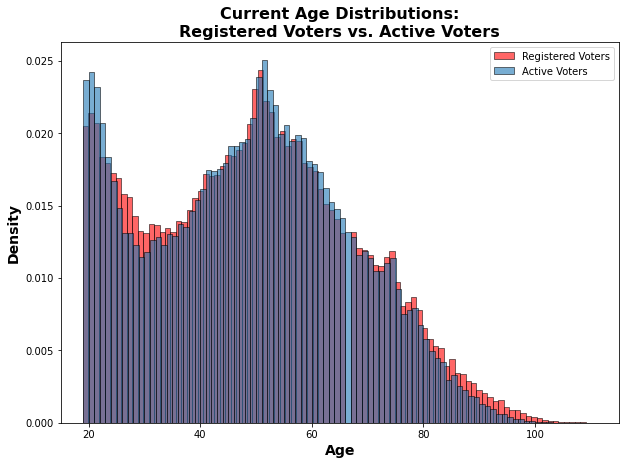

In [35]:
compare_age_distr(uc_vreg, 'Registered Voters', 
                  active_voters, 'Active Voters');

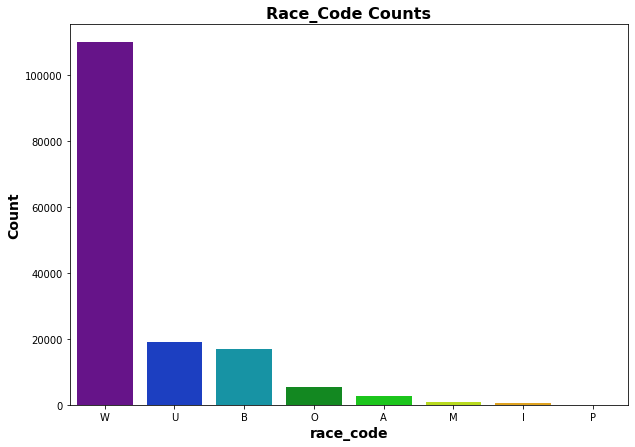

In [36]:
plot_count('race_code', active_voters);

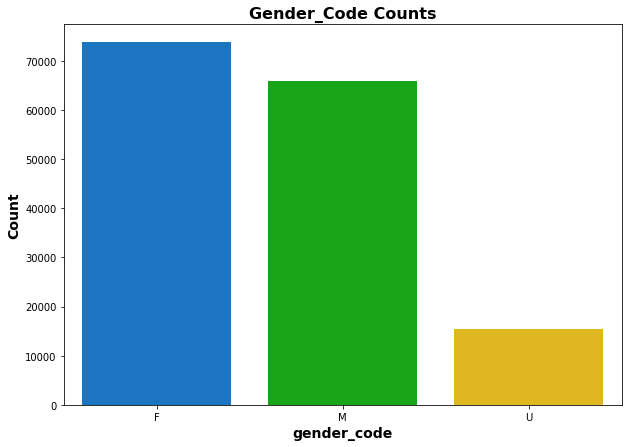

In [37]:
plot_count('gender_code', active_voters);

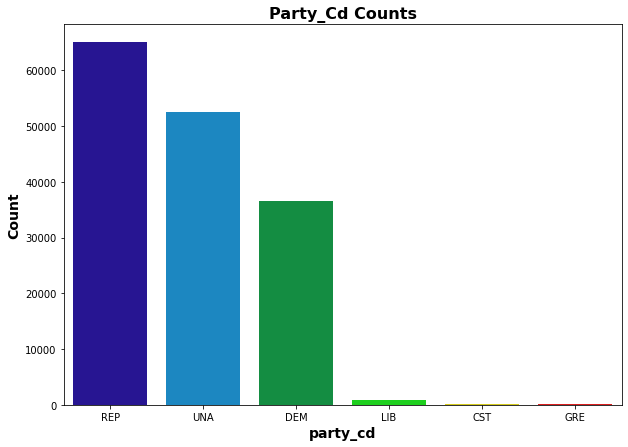

In [38]:
plot_count('party_cd', active_voters);

### Denied Voters

In [39]:
denied_voters = uc_vreg.groupby('voter_status_desc').get_group('DENIED')
print(len(denied_voters))
denied_voters.head()

1356


,county_id,county_desc,voter_reg_num,status_cd,voter_status_desc,reason_cd,voter_status_reason_desc,absent_ind,name_prefx_cd,last_name,first_name,middle_name,name_suffix_lbl,res_street_address,res_city_desc,state_cd,zip_code,mail_addr1,mail_addr2,mail_addr3,mail_addr4,mail_city,mail_state,mail_zipcode,full_phone_number,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,precinct_desc,municipality_abbrv,municipality_desc,ward_abbrv,ward_desc,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,county_commiss_abbrv,county_commiss_desc,township_abbrv,township_desc,school_dist_abbrv,school_dist_desc,fire_dist_abbrv,fire_dist_desc,water_dist_abbrv,water_dist_desc,sewer_dist_abbrv,sewer_dist_desc,sanit_dist_abbrv,sanit_dist_desc,rescue_dist_abbrv,rescue_dist_desc,munic_dist_abbrv,munic_dist_desc,dist_1_abbrv,dist_1_desc,dist_2_abbrv,dist_2_desc,confidential_ind,birth_year,ncid,vtd_abbrv,vtd_desc
124,90,UNION,265544,D,DENIED,DU,VERIFICATION RETURNED UNDELIVERABLE,,,ABDELRAHMAN,SAMIRA,IMAD,NaN,1007 MILLS HARRIS RD,MARSHVILLE,NC,28103.0,1007 MILLS HARRIS RD,NaN,NaN,NaN,MARSHVILLE,NC,28103,NaN,B,NL,UNA,F,29,NC,Y,07/27/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,N,1992,EF174501,NaN,NaN
330,90,UNION,365813,D,DENIED,DU,VERIFICATION RETURNED UNDELIVERABLE,,,ABSHERE,CHRISTINE,MAE,NaN,1516 MILLS HARRIS RD,WINGATE,NC,28174.0,1516 MILLS HARRIS RD,NaN,NaN,NaN,WINGATE,NC,28174,NaN,U,UN,REP,U,60,NaN,Y,08/06/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,N,1961,EF242578,NaN,NaN
529,90,UNION,241596,D,DENIED,DU,VERIFICATION RETURNED UNDELIVERABLE,,,ADAMO,ANGELO,NaN,NaN,1003 SANDBOX CIR,INDIAN TRAIL,NC,28079.0,1003 SANDBOX CIR,NaN,NaN,NaN,INDIAN TRAIL,NC,28079,NaN,W,NL,UNA,M,77,OC,Y,05/01/2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,N,1944,EF156089,NaN,NaN
581,90,UNION,199199,D,DENIED,DU,VERIFICATION RETURNED UNDELIVERABLE,,,ADAMS,CHERYL,YVONNE,NaN,4909 E HWY 74,WINGATE,NC,28174.0,4909 E HWY 74,NaN,NaN,NaN,WINGATE,NC,28174,NaN,W,NL,UNA,F,50,TX,Y,08/03/2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,N,1971,EF122557,NaN,NaN
596,90,UNION,318111,D,DENIED,DU,VERIFICATION RETURNED UNDELIVERABLE,,,ADAMS,DANIELE,ELIZABETH,NaN,3300 BROOKSTONE TRL,INDIAN TRAIL,NC,28079.0,3300 BROOKSTONE TRL,NaN,NaN,NaN,INDIAN TRAIL,NC,28079,NaN,W,NL,UNA,F,32,OC,Y,10/29/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,N,1989,EF210300,NaN,NaN


In [40]:
denied_voters['voter_status_reason_desc'].value_counts()

VERIFICATION RETURNED UNDELIVERABLE    1356
Name: voter_status_reason_desc, dtype: int64

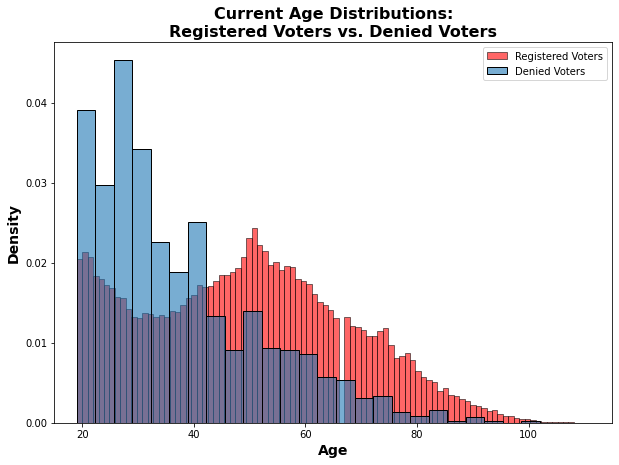

In [41]:
compare_age_distr(uc_vreg, 'Registered Voters', 
                  denied_voters, 'Denied Voters');

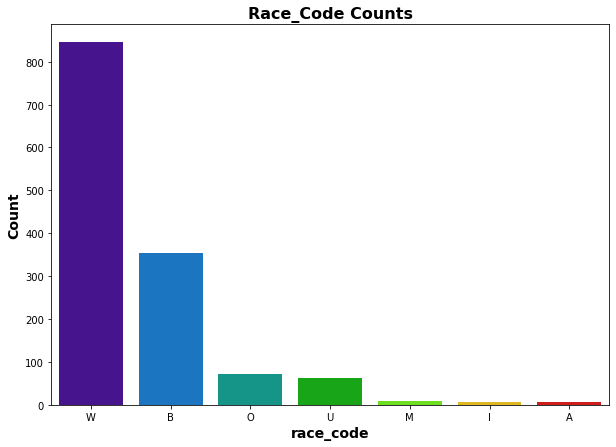

In [42]:
plot_count('race_code', denied_voters);

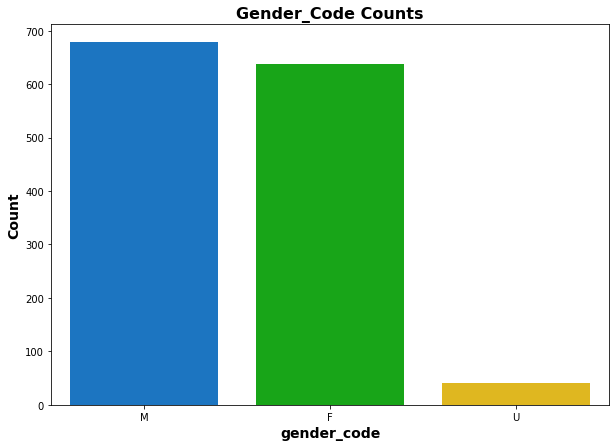

In [43]:
plot_count('gender_code', denied_voters);

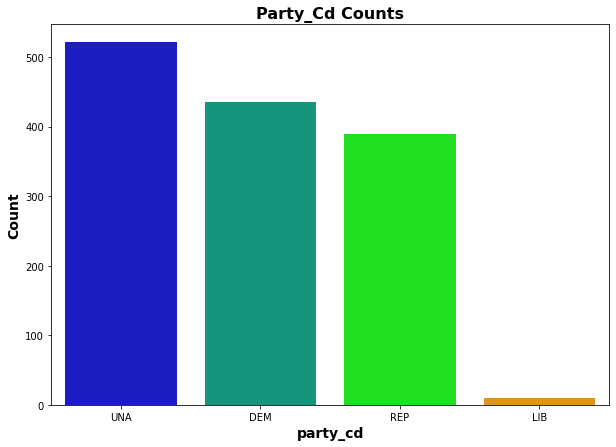

In [44]:
plot_count('party_cd', denied_voters);

### Inactive Voters

In [45]:
inactive_voters = uc_vreg.groupby('voter_status_desc').get_group('INACTIVE')
print(len(inactive_voters))
inactive_voters.head()

14748


,county_id,county_desc,voter_reg_num,status_cd,voter_status_desc,reason_cd,voter_status_reason_desc,absent_ind,name_prefx_cd,last_name,first_name,middle_name,name_suffix_lbl,res_street_address,res_city_desc,state_cd,zip_code,mail_addr1,mail_addr2,mail_addr3,mail_addr4,mail_city,mail_state,mail_zipcode,full_phone_number,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,precinct_desc,municipality_abbrv,municipality_desc,ward_abbrv,ward_desc,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,county_commiss_abbrv,county_commiss_desc,township_abbrv,township_desc,school_dist_abbrv,school_dist_desc,fire_dist_abbrv,fire_dist_desc,water_dist_abbrv,water_dist_desc,sewer_dist_abbrv,sewer_dist_desc,sanit_dist_abbrv,sanit_dist_desc,rescue_dist_abbrv,rescue_dist_desc,munic_dist_abbrv,munic_dist_desc,dist_1_abbrv,dist_1_desc,dist_2_abbrv,dist_2_desc,confidential_ind,birth_year,ncid,vtd_abbrv,vtd_desc
21,90,UNION,283607,I,INACTIVE,IN,CONFIRMATION NOT RETURNED,,,ABAR,KRISTEN,ELAINE,NaN,5523 CHERAW RD,MARSHVILLE,NC,28103.0,5523 CHERAW RD,NaN,NaN,NaN,MARSHVILLE,NC,28103,NaN,W,NL,DEM,F,25,NC,Y,02/17/2014,026,026,NaN,NaN,NaN,NaN,9.0,20B,20C,35.0,55.0,NaN,NaN,NaN,NaN,2.0,SCHOOL #2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,30TH PROSECUTORIAL,,,N,1996,EF187881,026,026
35,90,UNION,304093,I,INACTIVE,IN,CONFIRMATION NOT RETURNED,,,ABARCA-NICOLAS,JOSE,ALBERTO,NaN,616 JONES ST,MONROE,NC,28110.0,616 JONES ST,NaN,NaN,NaN,MONROE,NC,28110,NaN,O,NL,UNA,M,23,NC,Y,04/26/2016,004,004,2.0,MONROE,NaN,NaN,9.0,20B,20B,35.0,69.0,NaN,NaN,NaN,NaN,1.0,SCHOOL #1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,MONROE,30.0,30TH PROSECUTORIAL,,,N,1998,EF201789,004,004
45,90,UNION,200444,I,INACTIVE,IN,CONFIRMATION NOT RETURNED,,,ABBAS,OMAR,MOHAMED,NaN,2206 HONEYCUTT SIMPSON RD,MONROE,NC,28110.0,2206 HONEYCUTT SIMPSON RD,NaN,NaN,NaN,MONROE,NC,28110,NaN,O,UN,UNA,M,34,NJ,Y,10/03/2005,013,013,98.0,UNIONVILLE,NaN,NaN,9.0,20B,20B,35.0,69.0,NaN,NaN,NaN,NaN,4.0,SCHOOL #4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.0,UNIONVILLE,30.0,30TH PROSECUTORIAL,,,N,1987,EF123802,013,013
87,90,UNION,240783,I,INACTIVE,IN,CONFIRMATION NOT RETURNED,,,ABBOTT,MARY,SUE,NaN,4122 EUTAW DR,WAXHAW,NC,28173.0,4122 EUTAW DR,NaN,NaN,NaN,WAXHAW,NC,28173,NaN,W,NL,UNA,F,41,WV,Y,03/04/2009,020A,020A,5.0,WAXHAW,NaN,NaN,9.0,20B,20C,35.0,68.0,NaN,NaN,NaN,NaN,2.0,SCHOOL #2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,WAXHAW,30.0,30TH PROSECUTORIAL,,,N,1980,EF155408,020A,020A
90,90,UNION,236007,I,INACTIVE,IN,CONFIRMATION NOT RETURNED,,,ABBOTT,NEIL,NaN,NaN,5127 CRUZ BAY DR,MONROE,NC,28110.0,5127 CRUZ BAY DR,NaN,NaN,NaN,MONROE,NC,28110,NaN,W,UN,UNA,U,42,NaN,Y,10/10/2008,031,031,NaN,NaN,NaN,NaN,9.0,20B,20C,35.0,55.0,NaN,NaN,NaN,NaN,3.0,SCHOOL #3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,30TH PROSECUTORIAL,,,N,1979,EF151749,031,031


In [46]:
inactive_voters['voter_status_reason_desc'].value_counts()

CONFIRMATION NOT RETURNED              9333
CONFIRMATION RETURNED UNDELIVERABLE    5414
ADMINISTRATIVE                            1
Name: voter_status_reason_desc, dtype: int64

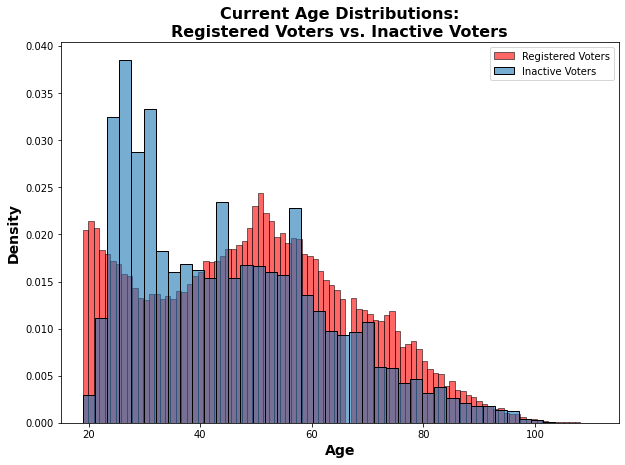

In [47]:
compare_age_distr(uc_vreg, 'Registered Voters', 
                  inactive_voters, 'Inactive Voters');

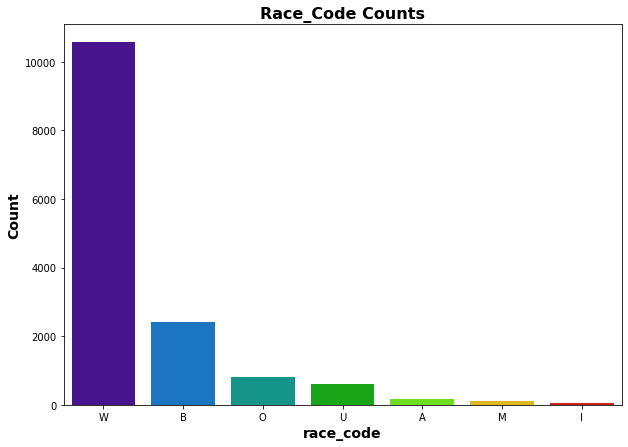

In [48]:
plot_count('race_code', inactive_voters);

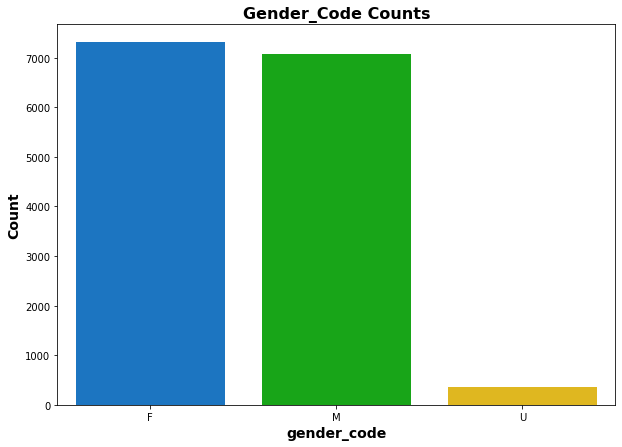

In [49]:
plot_count('gender_code', inactive_voters);

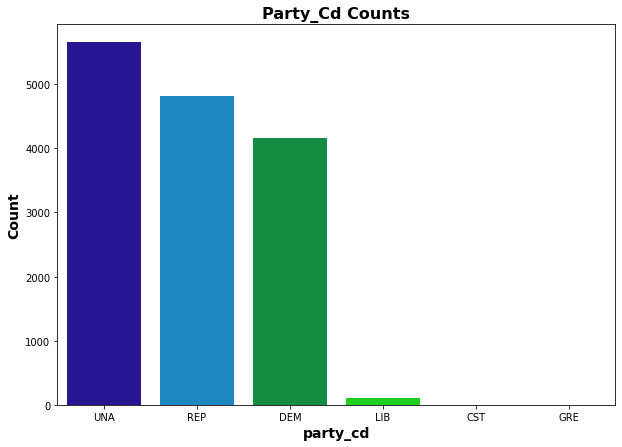

In [50]:
plot_count('party_cd', inactive_voters);

### Removed Voters

In [51]:
removed_voters = uc_vreg.groupby('voter_status_desc').get_group('REMOVED')
print(len(removed_voters))
removed_voters.head()

13554


,county_id,county_desc,voter_reg_num,status_cd,voter_status_desc,reason_cd,voter_status_reason_desc,absent_ind,name_prefx_cd,last_name,first_name,middle_name,name_suffix_lbl,res_street_address,res_city_desc,state_cd,zip_code,mail_addr1,mail_addr2,mail_addr3,mail_addr4,mail_city,mail_state,mail_zipcode,full_phone_number,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,precinct_desc,municipality_abbrv,municipality_desc,ward_abbrv,ward_desc,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,county_commiss_abbrv,county_commiss_desc,township_abbrv,township_desc,school_dist_abbrv,school_dist_desc,fire_dist_abbrv,fire_dist_desc,water_dist_abbrv,water_dist_desc,sewer_dist_abbrv,sewer_dist_desc,sanit_dist_abbrv,sanit_dist_desc,rescue_dist_abbrv,rescue_dist_desc,munic_dist_abbrv,munic_dist_desc,dist_1_abbrv,dist_1_desc,dist_2_abbrv,dist_2_desc,confidential_ind,birth_year,ncid,vtd_abbrv,vtd_desc
20,90,UNION,259695,R,REMOVED,RM,REMOVED AFTER 2 FED GENERAL ELECTIONS IN INACT...,,,ABAR,JAMES,FREDERICK,,REMOVED,NaN,NaN,NaN,,,,,,,,NaN,W,NL,REP,M,50,MI,Y,02/09/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,N,1971,EF170044,NaN,NaN
62,90,UNION,243470,R,REMOVED,RL,MOVED FROM COUNTY,,,ABBEN,LAURIN,DOROTHY,,REMOVED,NaN,NaN,NaN,,,,,,,,NaN,W,NL,REP,F,30,FL,N,09/01/2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,N,1991,EF157603,NaN,NaN
68,90,UNION,190348,R,REMOVED,RS,MOVED FROM STATE,,,ABBOTT,ALAN,WALTER,,REMOVED,NaN,NaN,NaN,,,,,,,,NaN,W,NL,REP,M,53,NY,Y,09/15/2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,N,1968,EF113706,NaN,NaN
73,90,UNION,157042,R,REMOVED,RD,DECEASED,,,ABBOTT,CHARLES,NaN,,REMOVED,NaN,NaN,NaN,,,,,,,,NaN,B,NL,DEM,M,62,NaN,Y,06/12/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,N,1959,EF80777,NaN,NaN
78,90,UNION,262940,R,REMOVED,RM,REMOVED AFTER 2 FED GENERAL ELECTIONS IN INACT...,,,ABBOTT,HARLEY,CHEYENNE,,REMOVED,NaN,NaN,NaN,,,,,,,,NaN,W,NL,DEM,F,28,WV,Y,07/10/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,N,1993,EF172613,NaN,NaN


In [52]:
removed_voters['voter_status_reason_desc'].value_counts()

DECEASED                                                    6179
MOVED FROM STATE                                            3720
REMOVED AFTER 2 FED GENERAL ELECTIONS IN INACTIVE STATUS    1569
MOVED FROM COUNTY                                           1418
MOVED WITHIN STATE                                           169
FELONY SENTENCE COMPLETED                                    158
REQUEST FROM VOTER                                           126
FELONY CONVICTION                                            110
TEMPORARY REGISTRANT                                          73
DUPLICATE                                                     27
ADMINISTRATIVE                                                 5
Name: voter_status_reason_desc, dtype: int64

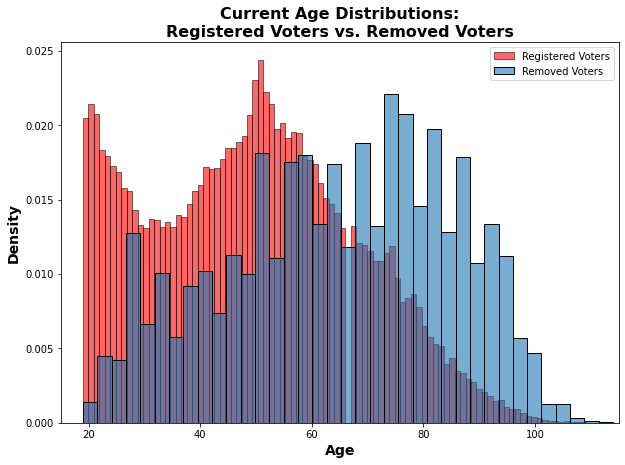

In [53]:
compare_age_distr(uc_vreg, 'Registered Voters', 
                  removed_voters, 'Removed Voters');

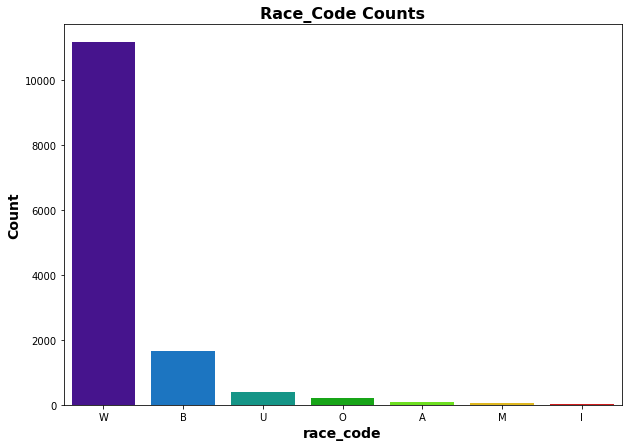

In [54]:
plot_count('race_code', removed_voters);

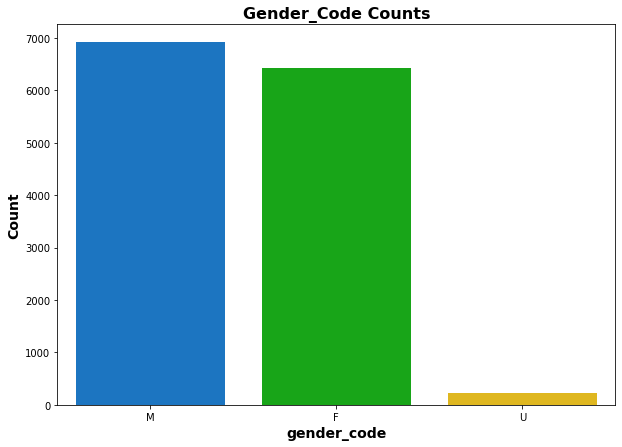

In [55]:
plot_count('gender_code', removed_voters);

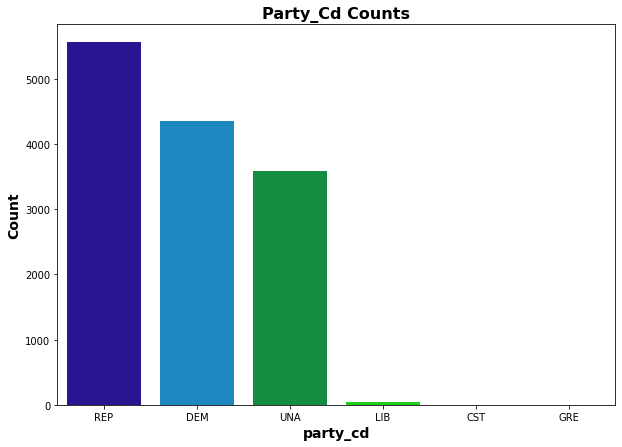

In [56]:
plot_count('party_cd', removed_voters);

## Merge Voter Registration Data with Voter History Data

In [57]:
## Merge voter registration information onto records of voter history based 
  ## on unique ncid
    
## Use right join so we're only including ncid's for which their is
  ## registration and demographic information, including for those 
    ## people who are registered, but have never voted
all_uc_voters = uc_vhis.merge(uc_vreg.drop(columns=['county_id', 'county_desc',
                                                'voter_reg_num'], axis=1),
                                       how='right', on='ncid')
# inspect new dataframe
display(all_uc_voters.head())
all_uc_voters.tail()

,county_id,county_desc,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,voted_party_desc,pct_label,pct_description,ncid,voted_county_id,voted_county_desc,vtd_label,vtd_description,status_cd,voter_status_desc,reason_cd,voter_status_reason_desc,absent_ind,name_prefx_cd,last_name,first_name,middle_name,name_suffix_lbl,res_street_address,res_city_desc,state_cd,zip_code,mail_addr1,mail_addr2,mail_addr3,mail_addr4,mail_city,mail_state,mail_zipcode,full_phone_number,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,precinct_desc,municipality_abbrv,municipality_desc,ward_abbrv,ward_desc,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,county_commiss_abbrv,county_commiss_desc,township_abbrv,township_desc,school_dist_abbrv,school_dist_desc,fire_dist_abbrv,fire_dist_desc,water_dist_abbrv,water_dist_desc,sewer_dist_abbrv,sewer_dist_desc,sanit_dist_abbrv,sanit_dist_desc,rescue_dist_abbrv,rescue_dist_desc,munic_dist_abbrv,munic_dist_desc,dist_1_abbrv,dist_1_desc,dist_2_abbrv,dist_2_desc,confidential_ind,birth_year,vtd_abbrv,vtd_desc
0,90.0,UNION,285297.0,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,REPUBLICAN,016,016,AA100547,90.0,UNION,016,016,A,ACTIVE,AV,VERIFIED,,,FREDERICK,DONALD,EUGENE,NaN,5514 BEVERLY DR,INDIAN TRAIL,NC,28079.0,5514 BEVERLY DR,NaN,NaN,NaN,INDIAN TRAIL,NC,28079,NaN,W,UN,REP,M,66,NC,Y,03/31/2014,016,016,95.0,HEMBY BRIDGE,NaN,NaN,9.0,20B,20C,35.0,69.0,NaN,NaN,NaN,NaN,4.0,SCHOOL #4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.0,HEMBY BRIDGE,30.0,30TH PROSECUTORIAL,,,N,1955,016,016
1,90.0,UNION,285297.0,09/10/2019,09/10/2019 GENERAL,ABSENTEE ONESTOP,REP,REPUBLICAN,016,016,AA100547,90.0,UNION,016,016,A,ACTIVE,AV,VERIFIED,,,FREDERICK,DONALD,EUGENE,NaN,5514 BEVERLY DR,INDIAN TRAIL,NC,28079.0,5514 BEVERLY DR,NaN,NaN,NaN,INDIAN TRAIL,NC,28079,NaN,W,UN,REP,M,66,NC,Y,03/31/2014,016,016,95.0,HEMBY BRIDGE,NaN,NaN,9.0,20B,20C,35.0,69.0,NaN,NaN,NaN,NaN,4.0,SCHOOL #4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.0,HEMBY BRIDGE,30.0,30TH PROSECUTORIAL,,,N,1955,016,016
2,90.0,UNION,285297.0,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,REPUBLICAN,016,016,AA100547,90.0,UNION,016,016,A,ACTIVE,AV,VERIFIED,,,FREDERICK,DONALD,EUGENE,NaN,5514 BEVERLY DR,INDIAN TRAIL,NC,28079.0,5514 BEVERLY DR,NaN,NaN,NaN,INDIAN TRAIL,NC,28079,NaN,W,UN,REP,M,66,NC,Y,03/31/2014,016,016,95.0,HEMBY BRIDGE,NaN,NaN,9.0,20B,20C,35.0,69.0,NaN,NaN,NaN,NaN,4.0,SCHOOL #4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.0,HEMBY BRIDGE,30.0,30TH PROSECUTORIAL,,,N,1955,016,016
3,90.0,UNION,285297.0,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,REPUBLICAN,016,016,AA100547,90.0,UNION,016,016,A,ACTIVE,AV,VERIFIED,,,FREDERICK,DONALD,EUGENE,NaN,5514 BEVERLY DR,INDIAN TRAIL,NC,28079.0,5514 BEVERLY DR,NaN,NaN,NaN,INDIAN TRAIL,NC,28079,NaN,W,UN,REP,M,66,NC,Y,03/31/2014,016,016,95.0,HEMBY BRIDGE,NaN,NaN,9.0,20B,20C,35.0,69.0,NaN,NaN,NaN,NaN,4.0,SCHOOL #4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.0,HEMBY BRIDGE,30.0,30TH PROSECUTORIAL,,,N,1955,016,016
4,90.0,UNION,285297.0,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,REPUBLICAN,016,016,AA100547,90.0,UNION,016,016,A,ACTIVE,AV,VERIFIED,,,FREDERICK,DONALD,EUGENE,NaN,5514 BEVERLY DR,INDIAN TRAIL,NC,28079.0,5514 BEVERLY DR,NaN,NaN,NaN,INDIAN TRAIL,NC,28079,NaN,W,UN,REP,M,66,NC,Y,03/31/2014,016,016,95.0,HEMBY BRIDGE,NaN,NaN,9.0,20B,20C,35.0,69.0,NaN,NaN,NaN,NaN,4.0,SCHOOL #4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.0,HEMBY BRIDGE,30.0,30TH PROSECUTORIAL,,,N,1955,016,016


,county_id,county_desc,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,voted_party_desc,pct_label,pct_description,ncid,voted_county_id,voted_county_desc,vtd_label,vtd_description,status_cd,voter_status_desc,reason_cd,voter_status_reason_desc,absent_ind,name_prefx_cd,last_name,first_name,middle_name,name_suffix_lbl,res_street_address,res_city_desc,state_cd,zip_code,mail_addr1,mail_addr2,mail_addr3,mail_addr4,mail_city,mail_state,mail_zipcode,full_phone_number,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,precinct_desc,municipality_abbrv,municipality_desc,ward_abbrv,ward_desc,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,county_commiss_abbrv,county_commiss_desc,township_abbrv,township_desc,school_dist_abbrv,school_dist_desc,fire_dist_abbrv,fire_dist_desc,water_dist_abbrv,water_dist_desc,sewer_dist_abbrv,sewer_dist_desc,sanit_dist_abbrv,sanit_dist_desc,rescue_dist_abbrv,rescue_dist_desc,munic_dist_abbrv,munic_dist_desc,dist_1_abbrv,dist_1_desc,dist_2_abbrv,dist_2_desc,confidential_ind,birth_year,vtd_abbrv,vtd_desc
827093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EF237871,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,,,ZULUETA,ETHAN,FRANCISCO,NaN,3009 SHALFORD LN,MATTHEWS,NC,28104.0,3009 SHALFORD LN,NaN,NaN,NaN,MATTHEWS,NC,28104,NaN,A,NL,REP,M,19,NC,Y,01/03/2020,040,040,6.0,INDIAN TRAIL,NaN,NaN,9.0,20B,20C,35.0,68.0,NaN,NaN,NaN,NaN,5.0,SCHOOL #5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,INDIAN TRAIL,30.0,30TH PROSECUTORIAL,,,N,2002,040,040
827094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EM25093,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,,,ZUNKER,JASON,ARTHUR,NaN,2512 LOGAN CAROLINE LN,MONROE,NC,28110.0,2512 LOGAN CAROLINE LN,NaN,NaN,NaN,MONROE,NC,28110,NaN,W,NL,REP,M,42,WI,Y,05/26/2017,030,030,2.0,MONROE,NaN,NaN,9.0,20B,20C,35.0,69.0,NaN,NaN,NaN,NaN,3.0,SCHOOL #3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,MONROE,30.0,30TH PROSECUTORIAL,,,N,1979,030,030
827095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EF181504,NaN,NaN,NaN,NaN,I,INACTIVE,IN,CONFIRMATION NOT RETURNED,,,ZURALES,MARK,CHRISTOPHER,NaN,9207 RUSTIC CREEK TRL,WAXHAW,NC,28173.0,9207 RUSTIC CREEK TRL,NaN,NaN,NaN,WAXHAW,NC,28173,NaN,W,NL,DEM,M,34,AL,Y,01/23/2013,022,022,NaN,NaN,NaN,NaN,9.0,20B,20C,35.0,68.0,NaN,NaN,NaN,NaN,2.0,SCHOOL #2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,30TH PROSECUTORIAL,,,N,1987,022,022
827096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EF250083,NaN,NaN,NaN,NaN,A,ACTIVE,AN,UNVERIFIED NEW,,,ZWIEBACK,ADRIENNE,RENEE,NaN,5601 BALLENGER CT,WAXHAW,NC,28173.0,5601 BALLENGER CT,NaN,NaN,NaN,WAXHAW,NC,28173,NaN,W,NL,UNA,F,19,NC,Y,12/16/2020,019,019,NaN,NaN,NaN,NaN,9.0,20B,20C,35.0,68.0,NaN,NaN,NaN,NaN,6.0,SCHOOL #6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,30TH PROSECUTORIAL,,,N,2002,019,019
827097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EF219265,NaN,NaN,NaN,NaN,I,INACTIVE,IU,CONFIRMATION RETURNED UNDELIVERABLE,,,ZYWICKI,JENNIFER,ANN,NaN,5719 PARKSTONE DR,MATTHEWS,NC,28104.0,5719 PARKSTONE DR,NaN,NaN,NaN,MATTHEWS,NC,28104,NaN,W,NL,DEM,F,53,NY,Y,03/26/2018,040,040,NaN,NaN,NaN,NaN,9.0,20B,20C,35.0,68.0,NaN,NaN,NaN,NaN,5.0,SCHOOL #5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,30TH PROSECUTORIAL,,,N,1968,040,040


## Drop 'Removed' and 'Denied' Voters - Further Exploration

In [58]:
## Drop voters who have been removed or had their registration denied
uc_voters = all_uc_voters.loc[all_uc_voters['voter_status_desc'] != 'REMOVED']
uc_voters = uc_voters.loc[uc_voters['voter_status_desc'] != 'DENIED']
# uc_voters.info()

In [59]:
## Check remaining number of unique individuals represented in the data
uc_voters['ncid'].nunique()

170098

## Engineer Features for Grouping/ Database Manipulation

In [60]:
## Create a new column specifying the election category based on the
  ## election description col
uc_voters.insert(loc=5, column='election_cat', 
                 value=uc_voters['election_desc'].str.split(n=1,
                                                            expand=True)[1])
# If the category was general or primary, leave as is, otherwise 'other'
uc_voters['election_cat'] = np.where(uc_voters['election_cat'].isin(
                                                    ['GENERAL', 'PRIMARY']),
                                     uc_voters['election_cat'], 'other')

In [61]:
## Recast election_lbl as datetime and create a new col for just the year
uc_voters['election_lbl'] = pd.to_datetime(uc_voters['election_lbl'])
uc_voters.insert(loc=5, column='election_yr',
                 value=uc_voters['election_lbl'].dt.year)

In [62]:
## Create a new binary variable indicating if it was a major election
uc_voters.insert(loc=7, column='major_elec',
                 value=np.where(((uc_voters['election_yr']%2 == 0) & 
                                 (uc_voters['election_cat'].isin(
                                     ['GENERAL', 'PRIMARY']))),
                                1,0))

In [64]:
## Null values in the election_desc col indicate individuals that are 
  ## registered to vote, but have not voted in a recent major election.
    ## Thus, election_cat, major_elec, and presid_elec 
    ## are irrelevant for these records
# Fill irrelevant fields with null values
uc_voters.loc[uc_voters['election_desc'].isna(),
              ['election_cat', 'major_elec']] = np.nan

# Fill with NaN with 'None' in election_desc col to preserve info for
  # registered voters without a voting history when merging df's based on 
    # ncid and election_desc below
uc_voters['election_desc'].fillna('None', inplace=True)

# Inspect updated dataframe
uc_voters.head()

,county_id,county_desc,voter_reg_num,election_lbl,election_desc,election_yr,election_cat,major_elec,voting_method,voted_party_cd,voted_party_desc,pct_label,pct_description,ncid,voted_county_id,voted_county_desc,vtd_label,vtd_description,status_cd,voter_status_desc,reason_cd,voter_status_reason_desc,absent_ind,name_prefx_cd,last_name,first_name,middle_name,name_suffix_lbl,res_street_address,res_city_desc,state_cd,zip_code,mail_addr1,mail_addr2,mail_addr3,mail_addr4,mail_city,mail_state,mail_zipcode,full_phone_number,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,precinct_desc,municipality_abbrv,municipality_desc,ward_abbrv,ward_desc,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,county_commiss_abbrv,county_commiss_desc,township_abbrv,township_desc,school_dist_abbrv,school_dist_desc,fire_dist_abbrv,fire_dist_desc,water_dist_abbrv,water_dist_desc,sewer_dist_abbrv,sewer_dist_desc,sanit_dist_abbrv,sanit_dist_desc,rescue_dist_abbrv,rescue_dist_desc,munic_dist_abbrv,munic_dist_desc,dist_1_abbrv,dist_1_desc,dist_2_abbrv,dist_2_desc,confidential_ind,birth_year,vtd_abbrv,vtd_desc
0,90.0,UNION,285297.0,2016-11-08,11/08/2016 GENERAL,2016.0,GENERAL,1.0,ABSENTEE ONESTOP,REP,REPUBLICAN,016,016,AA100547,90.0,UNION,016,016,A,ACTIVE,AV,VERIFIED,,,FREDERICK,DONALD,EUGENE,NaN,5514 BEVERLY DR,INDIAN TRAIL,NC,28079.0,5514 BEVERLY DR,NaN,NaN,NaN,INDIAN TRAIL,NC,28079,NaN,W,UN,REP,M,66,NC,Y,03/31/2014,016,016,95.0,HEMBY BRIDGE,NaN,NaN,9.0,20B,20C,35.0,69.0,NaN,NaN,NaN,NaN,4.0,SCHOOL #4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.0,HEMBY BRIDGE,30.0,30TH PROSECUTORIAL,,,N,1955,016,016
1,90.0,UNION,285297.0,2019-09-10,09/10/2019 GENERAL,2019.0,GENERAL,0.0,ABSENTEE ONESTOP,REP,REPUBLICAN,016,016,AA100547,90.0,UNION,016,016,A,ACTIVE,AV,VERIFIED,,,FREDERICK,DONALD,EUGENE,NaN,5514 BEVERLY DR,INDIAN TRAIL,NC,28079.0,5514 BEVERLY DR,NaN,NaN,NaN,INDIAN TRAIL,NC,28079,NaN,W,UN,REP,M,66,NC,Y,03/31/2014,016,016,95.0,HEMBY BRIDGE,NaN,NaN,9.0,20B,20C,35.0,69.0,NaN,NaN,NaN,NaN,4.0,SCHOOL #4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.0,HEMBY BRIDGE,30.0,30TH PROSECUTORIAL,,,N,1955,016,016
2,90.0,UNION,285297.0,2020-03-03,03/03/2020 PRIMARY,2020.0,PRIMARY,1.0,IN-PERSON,REP,REPUBLICAN,016,016,AA100547,90.0,UNION,016,016,A,ACTIVE,AV,VERIFIED,,,FREDERICK,DONALD,EUGENE,NaN,5514 BEVERLY DR,INDIAN TRAIL,NC,28079.0,5514 BEVERLY DR,NaN,NaN,NaN,INDIAN TRAIL,NC,28079,NaN,W,UN,REP,M,66,NC,Y,03/31/2014,016,016,95.0,HEMBY BRIDGE,NaN,NaN,9.0,20B,20C,35.0,69.0,NaN,NaN,NaN,NaN,4.0,SCHOOL #4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.0,HEMBY BRIDGE,30.0,30TH PROSECUTORIAL,,,N,1955,016,016
3,90.0,UNION,285297.0,2018-11-06,11/06/2018 GENERAL,2018.0,GENERAL,1.0,ABSENTEE ONESTOP,REP,REPUBLICAN,016,016,AA100547,90.0,UNION,016,016,A,ACTIVE,AV,VERIFIED,,,FREDERICK,DONALD,EUGENE,NaN,5514 BEVERLY DR,INDIAN TRAIL,NC,28079.0,5514 BEVERLY DR,NaN,NaN,NaN,INDIAN TRAIL,NC,28079,NaN,W,UN,REP,M,66,NC,Y,03/31/2014,016,016,95.0,HEMBY BRIDGE,NaN,NaN,9.0,20B,20C,35.0,69.0,NaN,NaN,NaN,NaN,4.0,SCHOOL #4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.0,HEMBY BRIDGE,30.0,30TH PROSECUTORIAL,,,N,1955,016,016
4,90.0,UNION,285297.0,2020-11-03,11/03/2020 GENERAL,2020.0,GENERAL,1.0,ABSENTEE ONESTOP,REP,REPUBLICAN,016,016,AA100547,90.0,UNION,016,016,A,ACTIVE,AV,VERIFIED,,,FREDERICK,DONALD,EUGENE,NaN,5514 BEVERLY DR,INDIAN TRAIL,NC,28079.0,5514 BEVERLY DR,NaN,NaN,NaN,INDIAN TRAIL,NC,28079,NaN,W,UN,REP,M,66,NC,Y,03/31/2014,016,016,95.0,HEMBY BRIDGE,NaN,NaN,9.0,20B,20C,35.0,69.0,NaN,NaN,NaN,NaN,4.0,SCHOOL #4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.0,HEMBY BRIDGE,30.0,30TH PROSECUTORIAL,,,N,1955,016,016


In [65]:
## Check number of unique individuals represented by the data
uc_voters['ncid'].nunique()

170098

In [66]:
## Store index of non-major and non-null election types
other_elec_idx = uc_voters.loc[uc_voters['election_cat']=='other'].index

## Create a df containing only major and null elections
major_elec_df = uc_voters.drop(index=other_elec_idx)

# Check number of unique individuals that voted in a recent major election, 
  # plus those with no voting history
print(major_elec_df['ncid'].nunique())

# 131 registered voters voted in a non-major election, but no major elections
uc_voters['ncid'].nunique() - major_elec_df['ncid'].nunique()

169967


131

## Merge DataFrames - Focus on Recent Major Elections

In [67]:
## Get list of unique ncids
uc_ncid_list = list(uc_voters['ncid'].unique())

## Get list of unique election descriptions
major_elections = list(uc_voters.groupby('major_elec').get_group(1)['election_desc'].unique())

## Add 'None' to the list to capture individuals that have not voted in any 
  ## recent major election when merging dataframes on ncid and election_desc
elec_desc_list = major_elections + ['None']
elec_desc_list

['11/08/2016 GENERAL',
 '03/03/2020 PRIMARY',
 '11/06/2018 GENERAL',
 '11/03/2020 GENERAL',
 '05/08/2012 PRIMARY',
 '11/06/2012 GENERAL',
 '11/04/2014 GENERAL',
 '05/06/2014 PRIMARY',
 '03/15/2016 PRIMARY',
 '05/08/2018 PRIMARY',
 'None']

In [68]:
## Create multiindex that lists every election for every registered voter
mltidx = pd.MultiIndex.from_tuples(
    [(ncid, elec) for ncid in uc_ncid_list for elec in elec_desc_list],
    names=['ncid', 'election_desc'])

## Use multiindex to create new dataframe
elecs_by_voter = pd.DataFrame(index=mltidx)

In [69]:
## Check length and inspect structure of new dataframe
print(len(elecs_by_voter))
elecs_by_voter.head(15)

1871078


Empty DataFrame
Columns: []
Index: [(AA100547, 11/08/2016 GENERAL), (AA100547, 03/03/2020 PRIMARY), (AA100547, 11/06/2018 GENERAL), (AA100547, 11/03/2020 GENERAL), (AA100547, 05/08/2012 PRIMARY), (AA100547, 11/06/2012 GENERAL), (AA100547, 11/04/2014 GENERAL), (AA100547, 05/06/2014 PRIMARY), (AA100547, 03/15/2016 PRIMARY), (AA100547, 05/08/2018 PRIMARY), (AA100547, None), (AA108801, 11/08/2016 GENERAL), (AA108801, 03/03/2020 PRIMARY), (AA108801, 11/06/2018 GENERAL), (AA108801, 11/03/2020 GENERAL)]

In [70]:
elecs_by_voter.reset_index(inplace=True)
elecs_by_voter.head(15)

,ncid,election_desc
0,AA100547,11/08/2016 GENERAL
1,AA100547,03/03/2020 PRIMARY
2,AA100547,11/06/2018 GENERAL
3,AA100547,11/03/2020 GENERAL
4,AA100547,05/08/2012 PRIMARY
5,AA100547,11/06/2012 GENERAL
6,AA100547,11/04/2014 GENERAL
7,AA100547,05/06/2014 PRIMARY
8,AA100547,03/15/2016 PRIMARY
9,AA100547,05/08/2018 PRIMARY


In [71]:
## Merge voter histories using the created multiindex as the keys to join
  ## each ncid onto every election and 'None'
voter_elecs = elecs_by_voter.merge(uc_vhis, how='left',
                                   on=['ncid', 'election_desc'])
# Inspect new df
print(len(voter_elecs))
display(voter_elecs.head())
voter_elecs.tail()

1871087


,ncid,election_desc,county_id,county_desc,voter_reg_num,election_lbl,voting_method,voted_party_cd,voted_party_desc,pct_label,pct_description,voted_county_id,voted_county_desc,vtd_label,vtd_description
0,AA100547,11/08/2016 GENERAL,90.0,UNION,285297.0,11/08/2016,ABSENTEE ONESTOP,REP,REPUBLICAN,016,016,90.0,UNION,016,016
1,AA100547,03/03/2020 PRIMARY,90.0,UNION,285297.0,03/03/2020,IN-PERSON,REP,REPUBLICAN,016,016,90.0,UNION,016,016
2,AA100547,11/06/2018 GENERAL,90.0,UNION,285297.0,11/06/2018,ABSENTEE ONESTOP,REP,REPUBLICAN,016,016,90.0,UNION,016,016
3,AA100547,11/03/2020 GENERAL,90.0,UNION,285297.0,11/03/2020,ABSENTEE ONESTOP,REP,REPUBLICAN,016,016,90.0,UNION,016,016
4,AA100547,05/08/2012 PRIMARY,90.0,UNION,285297.0,05/08/2012,IN-PERSON,REP,REPUBLICAN,G07,G07,41.0,GUILFORD,G07,G07


,ncid,election_desc,county_id,county_desc,voter_reg_num,election_lbl,voting_method,voted_party_cd,voted_party_desc,pct_label,pct_description,voted_county_id,voted_county_desc,vtd_label,vtd_description
1871082,EF219265,11/04/2014 GENERAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871083,EF219265,05/06/2014 PRIMARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871084,EF219265,03/15/2016 PRIMARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871085,EF219265,05/08/2018 PRIMARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871086,EF219265,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
## Check for duplicate rows
voter_elecs.duplicated().sum()

0

In [73]:
## Create a list of columns to drop when performing next merge to limit size
  ## of new dataframe
# List of columns that were mostly null for original merged df
mostly_null_cols = [col for col in all_uc_voters.columns if all_uc_voters[col].isna().mean() >= 0.9]

# List of columns that are filled with empty white space
empty_cols = [col for col in all_uc_voters.columns if all_uc_voters[col].unique()[0] == ' ']

# List of municipality and mailing address info columns 
  # (not very useful, a lot of NaN)
munic_cols = [col for col in all_uc_voters.columns if col.startswith('munic')]
mail_cols = [col for col in all_uc_voters.columns if col.startswith('mail')]

# Combine all lists into one list of columns to drop
cols_to_drop = mostly_null_cols + empty_cols + munic_cols + mail_cols

In [74]:
## Merge voter registration information onto the new df based on ncid
voter_elecs = voter_elecs.merge(uc_vreg.drop(columns=cols_to_drop+['county_id',
                                                      'county_desc',
                                                      'voter_reg_num'],
                                             axis=1),
                                how='left', on='ncid')
# Inspect resulting df
voter_elecs.head()

,ncid,election_desc,county_id,county_desc,voter_reg_num,election_lbl,voting_method,voted_party_cd,voted_party_desc,pct_label,pct_description,voted_county_id,voted_county_desc,vtd_label,vtd_description,status_cd,voter_status_desc,reason_cd,voter_status_reason_desc,last_name,first_name,middle_name,res_street_address,res_city_desc,state_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,precinct_desc,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,school_dist_desc,dist_1_abbrv,dist_1_desc,confidential_ind,birth_year,vtd_abbrv,vtd_desc
0,AA100547,11/08/2016 GENERAL,90.0,UNION,285297.0,11/08/2016,ABSENTEE ONESTOP,REP,REPUBLICAN,016,016,90.0,UNION,016,016,A,ACTIVE,AV,VERIFIED,FREDERICK,DONALD,EUGENE,5514 BEVERLY DR,INDIAN TRAIL,NC,28079.0,W,UN,REP,M,66,NC,Y,03/31/2014,016,016,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1955,016,016
1,AA100547,03/03/2020 PRIMARY,90.0,UNION,285297.0,03/03/2020,IN-PERSON,REP,REPUBLICAN,016,016,90.0,UNION,016,016,A,ACTIVE,AV,VERIFIED,FREDERICK,DONALD,EUGENE,5514 BEVERLY DR,INDIAN TRAIL,NC,28079.0,W,UN,REP,M,66,NC,Y,03/31/2014,016,016,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1955,016,016
2,AA100547,11/06/2018 GENERAL,90.0,UNION,285297.0,11/06/2018,ABSENTEE ONESTOP,REP,REPUBLICAN,016,016,90.0,UNION,016,016,A,ACTIVE,AV,VERIFIED,FREDERICK,DONALD,EUGENE,5514 BEVERLY DR,INDIAN TRAIL,NC,28079.0,W,UN,REP,M,66,NC,Y,03/31/2014,016,016,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1955,016,016
3,AA100547,11/03/2020 GENERAL,90.0,UNION,285297.0,11/03/2020,ABSENTEE ONESTOP,REP,REPUBLICAN,016,016,90.0,UNION,016,016,A,ACTIVE,AV,VERIFIED,FREDERICK,DONALD,EUGENE,5514 BEVERLY DR,INDIAN TRAIL,NC,28079.0,W,UN,REP,M,66,NC,Y,03/31/2014,016,016,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1955,016,016
4,AA100547,05/08/2012 PRIMARY,90.0,UNION,285297.0,05/08/2012,IN-PERSON,REP,REPUBLICAN,G07,G07,41.0,GUILFORD,G07,G07,A,ACTIVE,AV,VERIFIED,FREDERICK,DONALD,EUGENE,5514 BEVERLY DR,INDIAN TRAIL,NC,28079.0,W,UN,REP,M,66,NC,Y,03/31/2014,016,016,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1955,016,016


<a id='maj_elec'></a>
## Major Elections

### Drop Duplicate and Obviously Incorrect Records

In [75]:
## Check for duplicate identical rows
voter_elecs.duplicated().sum()

0

In [76]:
## Check length of new df
len(voter_elecs)

1871087

In [77]:
## Check the intended length of the new df if every unique ncid
  ## appears only once for each election description
voter_elecs['ncid'].nunique() * voter_elecs['election_desc'].nunique()

1871078

In [78]:
## There are 9 instances where an ncid shows up as casting a vote
  ## more than once in the same election
voter_elecs.duplicated(subset=['ncid', 'election_desc']).sum()

9

In [79]:
## A total of 6 individuals show up twice for a single election
  ## One individual shows up twice in 3 separate elections
dup_ncid_elecs = voter_elecs.loc[voter_elecs.duplicated(subset=['ncid', 'election_desc'], keep=False)]
dup_ncid_elecs

,ncid,election_desc,county_id,county_desc,voter_reg_num,election_lbl,voting_method,voted_party_cd,voted_party_desc,pct_label,pct_description,voted_county_id,voted_county_desc,vtd_label,vtd_description,status_cd,voter_status_desc,reason_cd,voter_status_reason_desc,last_name,first_name,middle_name,res_street_address,res_city_desc,state_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,precinct_desc,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,school_dist_desc,dist_1_abbrv,dist_1_desc,confidential_ind,birth_year,vtd_abbrv,vtd_desc
66893,CW1012090,11/06/2018 GENERAL,90.0,UNION,338735.0,11/06/2018,PROVISIONAL,REP,REPUBLICAN,020B,020B,90.0,UNION,020B,020B,A,ACTIVE,AV,VERIFIED,RACER,JESSE,THOMAS,805 ABBEYWOOD DR,WAXHAW,NC,28173.0,W,NL,REP,M,33,NaN,Y,11/06/2018,020B,020B,9.0,20B,20C,35.0,68.0,6.0,SCHOOL #6,30.0,30TH PROSECUTORIAL,N,1988,020B,020B
66894,CW1012090,11/06/2018 GENERAL,90.0,UNION,338735.0,11/06/2018,IN-PERSON,REP,REPUBLICAN,058,PCT 058,60.0,MECKLENBURG,058,058,A,ACTIVE,AV,VERIFIED,RACER,JESSE,THOMAS,805 ABBEYWOOD DR,WAXHAW,NC,28173.0,W,NL,REP,M,33,NaN,Y,11/06/2018,020B,020B,9.0,20B,20C,35.0,68.0,6.0,SCHOOL #6,30.0,30TH PROSECUTORIAL,N,1988,020B,020B
299663,DB153036,11/08/2016 GENERAL,90.0,UNION,364740.0,11/08/2016,ABSENTEE ONESTOP,UNA,UNAFFILIATED,W16,W16,65.0,NEW HANOVER,W16,W16,A,ACTIVE,AV,VERIFIED,SUMMERS,JASON,BRAD,3806 CASSIDY DR,WAXHAW,NC,28173.0,U,UN,REP,U,49,NaN,Y,07/17/2020,020A,020A,9.0,20B,20C,35.0,68.0,2.0,SCHOOL #2,30.0,30TH PROSECUTORIAL,N,1972,020A,020A
299664,DB153036,11/08/2016 GENERAL,90.0,UNION,364740.0,11/08/2016,ABSENTEE ONESTOP,REP,REPUBLICAN,0070,SALEM,12.0,BURKE,0070,0070,A,ACTIVE,AV,VERIFIED,SUMMERS,JASON,BRAD,3806 CASSIDY DR,WAXHAW,NC,28173.0,U,UN,REP,U,49,NaN,Y,07/17/2020,020A,020A,9.0,20B,20C,35.0,68.0,2.0,SCHOOL #2,30.0,30TH PROSECUTORIAL,N,1972,020A,020A
299669,DB153036,11/06/2012 GENERAL,90.0,UNION,364740.0,11/06/2012,ABSENTEE ONESTOP,UNA,UNAFFILIATED,W25,W25,65.0,NEW HANOVER,W25,W25,A,ACTIVE,AV,VERIFIED,SUMMERS,JASON,BRAD,3806 CASSIDY DR,WAXHAW,NC,28173.0,U,UN,REP,U,49,NaN,Y,07/17/2020,020A,020A,9.0,20B,20C,35.0,68.0,2.0,SCHOOL #2,30.0,30TH PROSECUTORIAL,N,1972,020A,020A
299670,DB153036,11/06/2012 GENERAL,90.0,UNION,364740.0,11/06/2012,ABSENTEE ONESTOP,REP,REPUBLICAN,0070,SALEM,12.0,BURKE,0070,0070,A,ACTIVE,AV,VERIFIED,SUMMERS,JASON,BRAD,3806 CASSIDY DR,WAXHAW,NC,28173.0,U,UN,REP,U,49,NaN,Y,07/17/2020,020A,020A,9.0,20B,20C,35.0,68.0,2.0,SCHOOL #2,30.0,30TH PROSECUTORIAL,N,1972,020A,020A
299673,DB153036,03/15/2016 PRIMARY,90.0,UNION,364740.0,03/15/2016,ABSENTEE ONESTOP,DEM,DEMOCRATIC,W16,W16,65.0,NEW HANOVER,W16,W16,A,ACTIVE,AV,VERIFIED,SUMMERS,JASON,BRAD,3806 CASSIDY DR,WAXHAW,NC,28173.0,U,UN,REP,U,49,NaN,Y,07/17/2020,020A,020A,9.0,20B,20C,35.0,68.0,2.0,SCHOOL #2,30.0,30TH PROSECUTORIAL,N,1972,020A,020A
299674,DB153036,03/15/2016 PRIMARY,90.0,UNION,364740.0,03/15/2016,IN-PERSON,REP,REPUBLICAN,0070,SALEM,12.0,BURKE,0070,0070,A,ACTIVE,AV,VERIFIED,SUMMERS,JASON,BRAD,3806 CASSIDY DR,WAXHAW,NC,28173.0,U,UN,REP,U,49,NaN,Y,07/17/2020,020A,020A,9.0,20B,20C,35.0,68.0,2.0,SCHOOL #2,30.0,30TH PROSECUTORIAL,N,1972,020A,020A
677802,EF164225,11/08/2016 GENERAL,90.0,UNION,252400.0,11/08/2016,IN-PERSON,DEM,DEMOCRATIC,028D,028D,90.0,UNION,028,028,A,ACTIVE,AV,VERIFIED,SMITH,ANDRE,MAURICE,1401 RIDGEHAVEN RD,WAXHAW,NC,28173.0,B,NL,DEM,M,41,MO,Y,01/13/2011,028D,028D,9.0,20B,20C,35.0,68.0,6.0,SCHOOL #6,30.0,30TH PROSECUTORIAL,N,1980,028,028
677803,EF164225,11/08/2016 GENERAL,90.0,UNION,252400.0,11/08/2016,ABSENTEE ONESTOP,REP,REPUBLICAN,022,PCT 022,60.0,MECKLENBURG,022,022,A,ACTIVE,AV,VERIFIED,SMITH,ANDRE,MAURICE,1401 RIDGEHAVEN RD,WAXHAW,NC,28173.0,B,NL,DEM,M,41,MO,Y,01/13/2011,028D,028D,9.0,20B,20C,35.0,68.0,6.0,SCHOOL #6,30.0,30TH PROSECUTORIAL,N,1980,028,028


In [80]:
## Examine the complete recent voting history of the 7 ncid's that show up 
  ## twice for a single election to investigate how the records differ
    ## and determine which record(s) to drop
for ncid in dup_ncid_elecs['ncid'].unique():
    display(voter_elecs.loc[voter_elecs['ncid']==ncid])

,ncid,election_desc,county_id,county_desc,voter_reg_num,election_lbl,voting_method,voted_party_cd,voted_party_desc,pct_label,pct_description,voted_county_id,voted_county_desc,vtd_label,vtd_description,status_cd,voter_status_desc,reason_cd,voter_status_reason_desc,last_name,first_name,middle_name,res_street_address,res_city_desc,state_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,precinct_desc,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,school_dist_desc,dist_1_abbrv,dist_1_desc,confidential_ind,birth_year,vtd_abbrv,vtd_desc
66891,CW1012090,11/08/2016 GENERAL,90.0,UNION,338735.0,11/08/2016,IN-PERSON,REP,REPUBLICAN,058,PCT 058,60.0,MECKLENBURG,058,058,A,ACTIVE,AV,VERIFIED,RACER,JESSE,THOMAS,805 ABBEYWOOD DR,WAXHAW,NC,28173.0,W,NL,REP,M,33,NaN,Y,11/06/2018,020B,020B,9.0,20B,20C,35.0,68.0,6.0,SCHOOL #6,30.0,30TH PROSECUTORIAL,N,1988,020B,020B
66892,CW1012090,03/03/2020 PRIMARY,90.0,UNION,338735.0,03/03/2020,ABSENTEE ONESTOP,REP,REPUBLICAN,020B,020B,90.0,UNION,020B,020B,A,ACTIVE,AV,VERIFIED,RACER,JESSE,THOMAS,805 ABBEYWOOD DR,WAXHAW,NC,28173.0,W,NL,REP,M,33,NaN,Y,11/06/2018,020B,020B,9.0,20B,20C,35.0,68.0,6.0,SCHOOL #6,30.0,30TH PROSECUTORIAL,N,1988,020B,020B
66893,CW1012090,11/06/2018 GENERAL,90.0,UNION,338735.0,11/06/2018,PROVISIONAL,REP,REPUBLICAN,020B,020B,90.0,UNION,020B,020B,A,ACTIVE,AV,VERIFIED,RACER,JESSE,THOMAS,805 ABBEYWOOD DR,WAXHAW,NC,28173.0,W,NL,REP,M,33,NaN,Y,11/06/2018,020B,020B,9.0,20B,20C,35.0,68.0,6.0,SCHOOL #6,30.0,30TH PROSECUTORIAL,N,1988,020B,020B
66894,CW1012090,11/06/2018 GENERAL,90.0,UNION,338735.0,11/06/2018,IN-PERSON,REP,REPUBLICAN,058,PCT 058,60.0,MECKLENBURG,058,058,A,ACTIVE,AV,VERIFIED,RACER,JESSE,THOMAS,805 ABBEYWOOD DR,WAXHAW,NC,28173.0,W,NL,REP,M,33,NaN,Y,11/06/2018,020B,020B,9.0,20B,20C,35.0,68.0,6.0,SCHOOL #6,30.0,30TH PROSECUTORIAL,N,1988,020B,020B
66895,CW1012090,11/03/2020 GENERAL,90.0,UNION,338735.0,11/03/2020,ABSENTEE ONESTOP,REP,REPUBLICAN,020B,020B,90.0,UNION,020B,020B,A,ACTIVE,AV,VERIFIED,RACER,JESSE,THOMAS,805 ABBEYWOOD DR,WAXHAW,NC,28173.0,W,NL,REP,M,33,NaN,Y,11/06/2018,020B,020B,9.0,20B,20C,35.0,68.0,6.0,SCHOOL #6,30.0,30TH PROSECUTORIAL,N,1988,020B,020B
66896,CW1012090,05/08/2012 PRIMARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,RACER,JESSE,THOMAS,805 ABBEYWOOD DR,WAXHAW,NC,28173.0,W,NL,REP,M,33,NaN,Y,11/06/2018,020B,020B,9.0,20B,20C,35.0,68.0,6.0,SCHOOL #6,30.0,30TH PROSECUTORIAL,N,1988,020B,020B
66897,CW1012090,11/06/2012 GENERAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,RACER,JESSE,THOMAS,805 ABBEYWOOD DR,WAXHAW,NC,28173.0,W,NL,REP,M,33,NaN,Y,11/06/2018,020B,020B,9.0,20B,20C,35.0,68.0,6.0,SCHOOL #6,30.0,30TH PROSECUTORIAL,N,1988,020B,020B
66898,CW1012090,11/04/2014 GENERAL,90.0,UNION,338735.0,11/04/2014,IN-PERSON,REP,REPUBLICAN,148,PCT 148,60.0,MECKLENBURG,148,148,A,ACTIVE,AV,VERIFIED,RACER,JESSE,THOMAS,805 ABBEYWOOD DR,WAXHAW,NC,28173.0,W,NL,REP,M,33,NaN,Y,11/06/2018,020B,020B,9.0,20B,20C,35.0,68.0,6.0,SCHOOL #6,30.0,30TH PROSECUTORIAL,N,1988,020B,020B
66899,CW1012090,05/06/2014 PRIMARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,RACER,JESSE,THOMAS,805 ABBEYWOOD DR,WAXHAW,NC,28173.0,W,NL,REP,M,33,NaN,Y,11/06/2018,020B,020B,9.0,20B,20C,35.0,68.0,6.0,SCHOOL #6,30.0,30TH PROSECUTORIAL,N,1988,020B,020B
66900,CW1012090,03/15/2016 PRIMARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,RACER,JESSE,THOMAS,805 ABBEYWOOD DR,WAXHAW,NC,28173.0,W,NL,REP,M,33,NaN,Y,11/06/2018,020B,020B,9.0,20B,20C,35.0,68.0,6.0,SCHOOL #6,30.0,30TH PROSECUTORIAL,N,1988,020B,020B


,ncid,election_desc,county_id,county_desc,voter_reg_num,election_lbl,voting_method,voted_party_cd,voted_party_desc,pct_label,pct_description,voted_county_id,voted_county_desc,vtd_label,vtd_description,status_cd,voter_status_desc,reason_cd,voter_status_reason_desc,last_name,first_name,middle_name,res_street_address,res_city_desc,state_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,precinct_desc,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,school_dist_desc,dist_1_abbrv,dist_1_desc,confidential_ind,birth_year,vtd_abbrv,vtd_desc
299663,DB153036,11/08/2016 GENERAL,90.0,UNION,364740.0,11/08/2016,ABSENTEE ONESTOP,UNA,UNAFFILIATED,W16,W16,65.0,NEW HANOVER,W16,W16,A,ACTIVE,AV,VERIFIED,SUMMERS,JASON,BRAD,3806 CASSIDY DR,WAXHAW,NC,28173.0,U,UN,REP,U,49,NaN,Y,07/17/2020,020A,020A,9.0,20B,20C,35.0,68.0,2.0,SCHOOL #2,30.0,30TH PROSECUTORIAL,N,1972,020A,020A
299664,DB153036,11/08/2016 GENERAL,90.0,UNION,364740.0,11/08/2016,ABSENTEE ONESTOP,REP,REPUBLICAN,0070,SALEM,12.0,BURKE,0070,0070,A,ACTIVE,AV,VERIFIED,SUMMERS,JASON,BRAD,3806 CASSIDY DR,WAXHAW,NC,28173.0,U,UN,REP,U,49,NaN,Y,07/17/2020,020A,020A,9.0,20B,20C,35.0,68.0,2.0,SCHOOL #2,30.0,30TH PROSECUTORIAL,N,1972,020A,020A
299665,DB153036,03/03/2020 PRIMARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,SUMMERS,JASON,BRAD,3806 CASSIDY DR,WAXHAW,NC,28173.0,U,UN,REP,U,49,NaN,Y,07/17/2020,020A,020A,9.0,20B,20C,35.0,68.0,2.0,SCHOOL #2,30.0,30TH PROSECUTORIAL,N,1972,020A,020A
299666,DB153036,11/06/2018 GENERAL,90.0,UNION,364740.0,11/06/2018,IN-PERSON,UNA,UNAFFILIATED,CF02,CF02,65.0,NEW HANOVER,CF02,CF02,A,ACTIVE,AV,VERIFIED,SUMMERS,JASON,BRAD,3806 CASSIDY DR,WAXHAW,NC,28173.0,U,UN,REP,U,49,NaN,Y,07/17/2020,020A,020A,9.0,20B,20C,35.0,68.0,2.0,SCHOOL #2,30.0,30TH PROSECUTORIAL,N,1972,020A,020A
299667,DB153036,11/03/2020 GENERAL,90.0,UNION,364740.0,11/03/2020,ABSENTEE ONESTOP,REP,REPUBLICAN,020A,020A,90.0,UNION,020A,020A,A,ACTIVE,AV,VERIFIED,SUMMERS,JASON,BRAD,3806 CASSIDY DR,WAXHAW,NC,28173.0,U,UN,REP,U,49,NaN,Y,07/17/2020,020A,020A,9.0,20B,20C,35.0,68.0,2.0,SCHOOL #2,30.0,30TH PROSECUTORIAL,N,1972,020A,020A
299668,DB153036,05/08/2012 PRIMARY,90.0,UNION,364740.0,05/08/2012,IN-PERSON,DEM,DEMOCRATIC,W25,W25,65.0,NEW HANOVER,W25,W25,A,ACTIVE,AV,VERIFIED,SUMMERS,JASON,BRAD,3806 CASSIDY DR,WAXHAW,NC,28173.0,U,UN,REP,U,49,NaN,Y,07/17/2020,020A,020A,9.0,20B,20C,35.0,68.0,2.0,SCHOOL #2,30.0,30TH PROSECUTORIAL,N,1972,020A,020A
299669,DB153036,11/06/2012 GENERAL,90.0,UNION,364740.0,11/06/2012,ABSENTEE ONESTOP,UNA,UNAFFILIATED,W25,W25,65.0,NEW HANOVER,W25,W25,A,ACTIVE,AV,VERIFIED,SUMMERS,JASON,BRAD,3806 CASSIDY DR,WAXHAW,NC,28173.0,U,UN,REP,U,49,NaN,Y,07/17/2020,020A,020A,9.0,20B,20C,35.0,68.0,2.0,SCHOOL #2,30.0,30TH PROSECUTORIAL,N,1972,020A,020A
299670,DB153036,11/06/2012 GENERAL,90.0,UNION,364740.0,11/06/2012,ABSENTEE ONESTOP,REP,REPUBLICAN,0070,SALEM,12.0,BURKE,0070,0070,A,ACTIVE,AV,VERIFIED,SUMMERS,JASON,BRAD,3806 CASSIDY DR,WAXHAW,NC,28173.0,U,UN,REP,U,49,NaN,Y,07/17/2020,020A,020A,9.0,20B,20C,35.0,68.0,2.0,SCHOOL #2,30.0,30TH PROSECUTORIAL,N,1972,020A,020A
299671,DB153036,11/04/2014 GENERAL,90.0,UNION,364740.0,11/04/2014,ABSENTEE ONESTOP,UNA,UNAFFILIATED,W16,W16,65.0,NEW HANOVER,W16,W16,A,ACTIVE,AV,VERIFIED,SUMMERS,JASON,BRAD,3806 CASSIDY DR,WAXHAW,NC,28173.0,U,UN,REP,U,49,NaN,Y,07/17/2020,020A,020A,9.0,20B,20C,35.0,68.0,2.0,SCHOOL #2,30.0,30TH PROSECUTORIAL,N,1972,020A,020A
299672,DB153036,05/06/2014 PRIMARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,SUMMERS,JASON,BRAD,3806 CASSIDY DR,WAXHAW,NC,28173.0,U,UN,REP,U,49,NaN,Y,07/17/2020,020A,020A,9.0,20B,20C,35.0,68.0,2.0,SCHOOL #2,30.0,30TH PROSECUTORIAL,N,1972,020A,020A


,ncid,election_desc,county_id,county_desc,voter_reg_num,election_lbl,voting_method,voted_party_cd,voted_party_desc,pct_label,pct_description,voted_county_id,voted_county_desc,vtd_label,vtd_description,status_cd,voter_status_desc,reason_cd,voter_status_reason_desc,last_name,first_name,middle_name,res_street_address,res_city_desc,state_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,precinct_desc,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,school_dist_desc,dist_1_abbrv,dist_1_desc,confidential_ind,birth_year,vtd_abbrv,vtd_desc
677802,EF164225,11/08/2016 GENERAL,90.0,UNION,252400.0,11/08/2016,IN-PERSON,DEM,DEMOCRATIC,028D,028D,90.0,UNION,028,028,A,ACTIVE,AV,VERIFIED,SMITH,ANDRE,MAURICE,1401 RIDGEHAVEN RD,WAXHAW,NC,28173.0,B,NL,DEM,M,41,MO,Y,01/13/2011,028D,028D,9.0,20B,20C,35.0,68.0,6.0,SCHOOL #6,30.0,30TH PROSECUTORIAL,N,1980,028,028
677803,EF164225,11/08/2016 GENERAL,90.0,UNION,252400.0,11/08/2016,ABSENTEE ONESTOP,REP,REPUBLICAN,022,PCT 022,60.0,MECKLENBURG,022,022,A,ACTIVE,AV,VERIFIED,SMITH,ANDRE,MAURICE,1401 RIDGEHAVEN RD,WAXHAW,NC,28173.0,B,NL,DEM,M,41,MO,Y,01/13/2011,028D,028D,9.0,20B,20C,35.0,68.0,6.0,SCHOOL #6,30.0,30TH PROSECUTORIAL,N,1980,028,028
677804,EF164225,03/03/2020 PRIMARY,90.0,UNION,252400.0,03/03/2020,IN-PERSON,DEM,DEMOCRATIC,028D,028D,90.0,UNION,028,028,A,ACTIVE,AV,VERIFIED,SMITH,ANDRE,MAURICE,1401 RIDGEHAVEN RD,WAXHAW,NC,28173.0,B,NL,DEM,M,41,MO,Y,01/13/2011,028D,028D,9.0,20B,20C,35.0,68.0,6.0,SCHOOL #6,30.0,30TH PROSECUTORIAL,N,1980,028,028
677805,EF164225,11/06/2018 GENERAL,90.0,UNION,252400.0,11/06/2018,IN-PERSON,DEM,DEMOCRATIC,028D,028D,90.0,UNION,028,028,A,ACTIVE,AV,VERIFIED,SMITH,ANDRE,MAURICE,1401 RIDGEHAVEN RD,WAXHAW,NC,28173.0,B,NL,DEM,M,41,MO,Y,01/13/2011,028D,028D,9.0,20B,20C,35.0,68.0,6.0,SCHOOL #6,30.0,30TH PROSECUTORIAL,N,1980,028,028
677806,EF164225,11/03/2020 GENERAL,90.0,UNION,252400.0,11/03/2020,ABSENTEE ONESTOP,DEM,DEMOCRATIC,028D,028D,90.0,UNION,028,028,A,ACTIVE,AV,VERIFIED,SMITH,ANDRE,MAURICE,1401 RIDGEHAVEN RD,WAXHAW,NC,28173.0,B,NL,DEM,M,41,MO,Y,01/13/2011,028D,028D,9.0,20B,20C,35.0,68.0,6.0,SCHOOL #6,30.0,30TH PROSECUTORIAL,N,1980,028,028
677807,EF164225,05/08/2012 PRIMARY,90.0,UNION,252400.0,05/08/2012,IN-PERSON,DEM,DEMOCRATIC,028D,028D,90.0,UNION,028,028,A,ACTIVE,AV,VERIFIED,SMITH,ANDRE,MAURICE,1401 RIDGEHAVEN RD,WAXHAW,NC,28173.0,B,NL,DEM,M,41,MO,Y,01/13/2011,028D,028D,9.0,20B,20C,35.0,68.0,6.0,SCHOOL #6,30.0,30TH PROSECUTORIAL,N,1980,028,028
677808,EF164225,11/06/2012 GENERAL,90.0,UNION,252400.0,11/06/2012,IN-PERSON,DEM,DEMOCRATIC,028D,028D,90.0,UNION,028,028,A,ACTIVE,AV,VERIFIED,SMITH,ANDRE,MAURICE,1401 RIDGEHAVEN RD,WAXHAW,NC,28173.0,B,NL,DEM,M,41,MO,Y,01/13/2011,028D,028D,9.0,20B,20C,35.0,68.0,6.0,SCHOOL #6,30.0,30TH PROSECUTORIAL,N,1980,028,028
677809,EF164225,11/04/2014 GENERAL,90.0,UNION,252400.0,11/04/2014,IN-PERSON,DEM,DEMOCRATIC,028D,028D,90.0,UNION,028,028,A,ACTIVE,AV,VERIFIED,SMITH,ANDRE,MAURICE,1401 RIDGEHAVEN RD,WAXHAW,NC,28173.0,B,NL,DEM,M,41,MO,Y,01/13/2011,028D,028D,9.0,20B,20C,35.0,68.0,6.0,SCHOOL #6,30.0,30TH PROSECUTORIAL,N,1980,028,028
677810,EF164225,05/06/2014 PRIMARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,SMITH,ANDRE,MAURICE,1401 RIDGEHAVEN RD,WAXHAW,NC,28173.0,B,NL,DEM,M,41,MO,Y,01/13/2011,028D,028D,9.0,20B,20C,35.0,68.0,6.0,SCHOOL #6,30.0,30TH PROSECUTORIAL,N,1980,028,028
677811,EF164225,03/15/2016 PRIMARY,90.0,UNION,252400.0,03/15/2016,IN-PERSON,DEM,DEMOCRATIC,028D,028D,90.0,UNION,028,028,A,ACTIVE,AV,VERIFIED,SMITH,ANDRE,MAURICE,1401 RIDGEHAVEN RD,WAXHAW,NC,28173.0,B,NL,DEM,M,41,MO,Y,01/13/2011,028D,028D,9.0,20B,20C,35.0,68.0,6.0,SCHOOL #6,30.0,30TH PROSECUTORIAL,N,1980,028,028


,ncid,election_desc,county_id,county_desc,voter_reg_num,election_lbl,voting_method,voted_party_cd,voted_party_desc,pct_label,pct_description,voted_county_id,voted_county_desc,vtd_label,vtd_description,status_cd,voter_status_desc,reason_cd,voter_status_reason_desc,last_name,first_name,middle_name,res_street_address,res_city_desc,state_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,precinct_desc,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,school_dist_desc,dist_1_abbrv,dist_1_desc,confidential_ind,birth_year,vtd_abbrv,vtd_desc
817624,EF186914,11/08/2016 GENERAL,90.0,UNION,307237.0,11/08/2016,IN-PERSON,REP,REPUBLICAN,039,039,90.0,UNION,039,039,A,ACTIVE,AV,VERIFIED,HOBBS,ASHLEY,NICOLE,6714 UNIONVILLE BRIEF RD,MONROE,NC,28110.0,W,NL,REP,F,27,NC,Y,07/09/2016,013,013,9.0,20B,20B,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1994,013,013
817625,EF186914,03/03/2020 PRIMARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,HOBBS,ASHLEY,NICOLE,6714 UNIONVILLE BRIEF RD,MONROE,NC,28110.0,W,NL,REP,F,27,NC,Y,07/09/2016,013,013,9.0,20B,20B,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1994,013,013
817626,EF186914,11/06/2018 GENERAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,HOBBS,ASHLEY,NICOLE,6714 UNIONVILLE BRIEF RD,MONROE,NC,28110.0,W,NL,REP,F,27,NC,Y,07/09/2016,013,013,9.0,20B,20B,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1994,013,013
817627,EF186914,11/03/2020 GENERAL,90.0,UNION,307237.0,11/03/2020,IN-PERSON,REP,REPUBLICAN,013,013,90.0,UNION,013,013,A,ACTIVE,AV,VERIFIED,HOBBS,ASHLEY,NICOLE,6714 UNIONVILLE BRIEF RD,MONROE,NC,28110.0,W,NL,REP,F,27,NC,Y,07/09/2016,013,013,9.0,20B,20B,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1994,013,013
817628,EF186914,05/08/2012 PRIMARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,HOBBS,ASHLEY,NICOLE,6714 UNIONVILLE BRIEF RD,MONROE,NC,28110.0,W,NL,REP,F,27,NC,Y,07/09/2016,013,013,9.0,20B,20B,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1994,013,013
817629,EF186914,11/06/2012 GENERAL,90.0,UNION,307237.0,11/06/2012,IN-PERSON,REP,REPUBLICAN,038A,038A,90.0,UNION,038A,038A,A,ACTIVE,AV,VERIFIED,HOBBS,ASHLEY,NICOLE,6714 UNIONVILLE BRIEF RD,MONROE,NC,28110.0,W,NL,REP,F,27,NC,Y,07/09/2016,013,013,9.0,20B,20B,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1994,013,013
817630,EF186914,11/06/2012 GENERAL,90.0,UNION,307237.0,11/06/2012,ABSENTEE ONESTOP,UNA,UNAFFILIATED,CUL,CULLOWHEE,50.0,JACKSON,CUL,CUL,A,ACTIVE,AV,VERIFIED,HOBBS,ASHLEY,NICOLE,6714 UNIONVILLE BRIEF RD,MONROE,NC,28110.0,W,NL,REP,F,27,NC,Y,07/09/2016,013,013,9.0,20B,20B,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1994,013,013
817631,EF186914,11/04/2014 GENERAL,90.0,UNION,307237.0,11/04/2014,IN-PERSON,REP,REPUBLICAN,038A,038A,90.0,UNION,038A,038A,A,ACTIVE,AV,VERIFIED,HOBBS,ASHLEY,NICOLE,6714 UNIONVILLE BRIEF RD,MONROE,NC,28110.0,W,NL,REP,F,27,NC,Y,07/09/2016,013,013,9.0,20B,20B,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1994,013,013
817632,EF186914,05/06/2014 PRIMARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,HOBBS,ASHLEY,NICOLE,6714 UNIONVILLE BRIEF RD,MONROE,NC,28110.0,W,NL,REP,F,27,NC,Y,07/09/2016,013,013,9.0,20B,20B,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1994,013,013
817633,EF186914,03/15/2016 PRIMARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,HOBBS,ASHLEY,NICOLE,6714 UNIONVILLE BRIEF RD,MONROE,NC,28110.0,W,NL,REP,F,27,NC,Y,07/09/2016,013,013,9.0,20B,20B,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1994,013,013


,ncid,election_desc,county_id,county_desc,voter_reg_num,election_lbl,voting_method,voted_party_cd,voted_party_desc,pct_label,pct_description,voted_county_id,voted_county_desc,vtd_label,vtd_description,status_cd,voter_status_desc,reason_cd,voter_status_reason_desc,last_name,first_name,middle_name,res_street_address,res_city_desc,state_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,precinct_desc,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,school_dist_desc,dist_1_abbrv,dist_1_desc,confidential_ind,birth_year,vtd_abbrv,vtd_desc
1500032,EF69085,11/08/2016 GENERAL,90.0,UNION,144979.0,11/08/2016,ABSENTEE ONESTOP,REP,REPUBLICAN,039,039,90.0,UNION,039,039,A,ACTIVE,AV,VERIFIED,HAULISKA,DAVID,CHARLES,6015 LANDER BENTON RD,MONROE,NC,28110.0,W,NL,REP,M,53,PA,Y,05/07/1998,039,039,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1968,039,039
1500033,EF69085,03/03/2020 PRIMARY,90.0,UNION,144979.0,03/03/2020,ABSENTEE ONESTOP,REP,REPUBLICAN,039,039,90.0,UNION,039,039,A,ACTIVE,AV,VERIFIED,HAULISKA,DAVID,CHARLES,6015 LANDER BENTON RD,MONROE,NC,28110.0,W,NL,REP,M,53,PA,Y,05/07/1998,039,039,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1968,039,039
1500034,EF69085,11/06/2018 GENERAL,90.0,UNION,144979.0,11/06/2018,IN-PERSON,REP,REPUBLICAN,039,039,90.0,UNION,039,039,A,ACTIVE,AV,VERIFIED,HAULISKA,DAVID,CHARLES,6015 LANDER BENTON RD,MONROE,NC,28110.0,W,NL,REP,M,53,PA,Y,05/07/1998,039,039,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1968,039,039
1500035,EF69085,11/03/2020 GENERAL,90.0,UNION,144979.0,11/03/2020,ABSENTEE ONESTOP,REP,REPUBLICAN,039,039,90.0,UNION,039,039,A,ACTIVE,AV,VERIFIED,HAULISKA,DAVID,CHARLES,6015 LANDER BENTON RD,MONROE,NC,28110.0,W,NL,REP,M,53,PA,Y,05/07/1998,039,039,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1968,039,039
1500036,EF69085,05/08/2012 PRIMARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,HAULISKA,DAVID,CHARLES,6015 LANDER BENTON RD,MONROE,NC,28110.0,W,NL,REP,M,53,PA,Y,05/07/1998,039,039,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1968,039,039
1500037,EF69085,11/06/2012 GENERAL,90.0,UNION,144979.0,11/06/2012,IN-PERSON,REP,REPUBLICAN,039,039,90.0,UNION,038A,038A,A,ACTIVE,AV,VERIFIED,HAULISKA,DAVID,CHARLES,6015 LANDER BENTON RD,MONROE,NC,28110.0,W,NL,REP,M,53,PA,Y,05/07/1998,039,039,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1968,039,039
1500038,EF69085,11/06/2012 GENERAL,90.0,UNION,144979.0,11/06/2012,IN-PERSON,REP,REPUBLICAN,039,039,90.0,UNION,039,039,A,ACTIVE,AV,VERIFIED,HAULISKA,DAVID,CHARLES,6015 LANDER BENTON RD,MONROE,NC,28110.0,W,NL,REP,M,53,PA,Y,05/07/1998,039,039,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1968,039,039
1500039,EF69085,11/04/2014 GENERAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,HAULISKA,DAVID,CHARLES,6015 LANDER BENTON RD,MONROE,NC,28110.0,W,NL,REP,M,53,PA,Y,05/07/1998,039,039,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1968,039,039
1500040,EF69085,05/06/2014 PRIMARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,HAULISKA,DAVID,CHARLES,6015 LANDER BENTON RD,MONROE,NC,28110.0,W,NL,REP,M,53,PA,Y,05/07/1998,039,039,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1968,039,039
1500041,EF69085,03/15/2016 PRIMARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,HAULISKA,DAVID,CHARLES,6015 LANDER BENTON RD,MONROE,NC,28110.0,W,NL,REP,M,53,PA,Y,05/07/1998,039,039,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1968,039,039


,ncid,election_desc,county_id,county_desc,voter_reg_num,election_lbl,voting_method,voted_party_cd,voted_party_desc,pct_label,pct_description,voted_county_id,voted_county_desc,vtd_label,vtd_description,status_cd,voter_status_desc,reason_cd,voter_status_reason_desc,last_name,first_name,middle_name,res_street_address,res_city_desc,state_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,precinct_desc,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,school_dist_desc,dist_1_abbrv,dist_1_desc,confidential_ind,birth_year,vtd_abbrv,vtd_desc
1542108,EF78820,11/08/2016 GENERAL,90.0,UNION,341724.0,11/08/2016,ABSENTEE ONESTOP,REP,REPUBLICAN,029A,029A,90.0,UNION,029A,029A,A,ACTIVE,AV,VERIFIED,CAPUTO,LISA,RAE,3503 SOUTHERN GINGER DR,INDIAN TRAIL,NC,28079.0,U,UN,REP,U,41,NaN,Y,01/10/2019,038A,038A,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1980,038A,038A
1542109,EF78820,11/08/2016 GENERAL,90.0,UNION,341724.0,11/08/2016,ABSENTEE ONESTOP,REP,REPUBLICAN,11-01,11-01,13.0,CABARRUS,11-01,11-01,A,ACTIVE,AV,VERIFIED,CAPUTO,LISA,RAE,3503 SOUTHERN GINGER DR,INDIAN TRAIL,NC,28079.0,U,UN,REP,U,41,NaN,Y,01/10/2019,038A,038A,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1980,038A,038A
1542110,EF78820,03/03/2020 PRIMARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,CAPUTO,LISA,RAE,3503 SOUTHERN GINGER DR,INDIAN TRAIL,NC,28079.0,U,UN,REP,U,41,NaN,Y,01/10/2019,038A,038A,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1980,038A,038A
1542111,EF78820,11/06/2018 GENERAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,CAPUTO,LISA,RAE,3503 SOUTHERN GINGER DR,INDIAN TRAIL,NC,28079.0,U,UN,REP,U,41,NaN,Y,01/10/2019,038A,038A,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1980,038A,038A
1542112,EF78820,11/03/2020 GENERAL,90.0,UNION,341724.0,11/03/2020,ABSENTEE ONESTOP,REP,REPUBLICAN,038A,038A,90.0,UNION,038A,038A,A,ACTIVE,AV,VERIFIED,CAPUTO,LISA,RAE,3503 SOUTHERN GINGER DR,INDIAN TRAIL,NC,28079.0,U,UN,REP,U,41,NaN,Y,01/10/2019,038A,038A,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1980,038A,038A
1542113,EF78820,05/08/2012 PRIMARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,CAPUTO,LISA,RAE,3503 SOUTHERN GINGER DR,INDIAN TRAIL,NC,28079.0,U,UN,REP,U,41,NaN,Y,01/10/2019,038A,038A,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1980,038A,038A
1542114,EF78820,11/06/2012 GENERAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,CAPUTO,LISA,RAE,3503 SOUTHERN GINGER DR,INDIAN TRAIL,NC,28079.0,U,UN,REP,U,41,NaN,Y,01/10/2019,038A,038A,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1980,038A,038A
1542115,EF78820,11/04/2014 GENERAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,CAPUTO,LISA,RAE,3503 SOUTHERN GINGER DR,INDIAN TRAIL,NC,28079.0,U,UN,REP,U,41,NaN,Y,01/10/2019,038A,038A,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1980,038A,038A
1542116,EF78820,05/06/2014 PRIMARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,CAPUTO,LISA,RAE,3503 SOUTHERN GINGER DR,INDIAN TRAIL,NC,28079.0,U,UN,REP,U,41,NaN,Y,01/10/2019,038A,038A,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1980,038A,038A
1542117,EF78820,03/15/2016 PRIMARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,CAPUTO,LISA,RAE,3503 SOUTHERN GINGER DR,INDIAN TRAIL,NC,28079.0,U,UN,REP,U,41,NaN,Y,01/10/2019,038A,038A,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1980,038A,038A


,ncid,election_desc,county_id,county_desc,voter_reg_num,election_lbl,voting_method,voted_party_cd,voted_party_desc,pct_label,pct_description,voted_county_id,voted_county_desc,vtd_label,vtd_description,status_cd,voter_status_desc,reason_cd,voter_status_reason_desc,last_name,first_name,middle_name,res_street_address,res_city_desc,state_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,precinct_desc,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,school_dist_desc,dist_1_abbrv,dist_1_desc,confidential_ind,birth_year,vtd_abbrv,vtd_desc
1613840,EF93894,11/08/2016 GENERAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,CHAMBERS,RONDA,SHENICE,710 KINTYRE DR,MONROE,NC,28112.0,B,NL,DEM,F,42,NC,Y,10/23/2012,004,004,9.0,20B,20B,35.0,69.0,1.0,SCHOOL #1,30.0,30TH PROSECUTORIAL,N,1979,004,004
1613841,EF93894,03/03/2020 PRIMARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,CHAMBERS,RONDA,SHENICE,710 KINTYRE DR,MONROE,NC,28112.0,B,NL,DEM,F,42,NC,Y,10/23/2012,004,004,9.0,20B,20B,35.0,69.0,1.0,SCHOOL #1,30.0,30TH PROSECUTORIAL,N,1979,004,004
1613842,EF93894,11/06/2018 GENERAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,CHAMBERS,RONDA,SHENICE,710 KINTYRE DR,MONROE,NC,28112.0,B,NL,DEM,F,42,NC,Y,10/23/2012,004,004,9.0,20B,20B,35.0,69.0,1.0,SCHOOL #1,30.0,30TH PROSECUTORIAL,N,1979,004,004
1613843,EF93894,11/03/2020 GENERAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,CHAMBERS,RONDA,SHENICE,710 KINTYRE DR,MONROE,NC,28112.0,B,NL,DEM,F,42,NC,Y,10/23/2012,004,004,9.0,20B,20B,35.0,69.0,1.0,SCHOOL #1,30.0,30TH PROSECUTORIAL,N,1979,004,004
1613844,EF93894,05/08/2012 PRIMARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,CHAMBERS,RONDA,SHENICE,710 KINTYRE DR,MONROE,NC,28112.0,B,NL,DEM,F,42,NC,Y,10/23/2012,004,004,9.0,20B,20B,35.0,69.0,1.0,SCHOOL #1,30.0,30TH PROSECUTORIAL,N,1979,004,004
1613845,EF93894,11/06/2012 GENERAL,90.0,UNION,272193.0,11/06/2012,IN-PERSON,DEM,DEMOCRATIC,BURN,BURNSVILLE,4.0,ANSON,BURN,BURN,A,ACTIVE,AV,VERIFIED,CHAMBERS,RONDA,SHENICE,710 KINTYRE DR,MONROE,NC,28112.0,B,NL,DEM,F,42,NC,Y,10/23/2012,004,004,9.0,20B,20B,35.0,69.0,1.0,SCHOOL #1,30.0,30TH PROSECUTORIAL,N,1979,004,004
1613846,EF93894,11/06/2012 GENERAL,90.0,UNION,272193.0,11/06/2012,ABSENTEE ONESTOP,DEM,DEMOCRATIC,009,009,90.0,UNION,009,009,A,ACTIVE,AV,VERIFIED,CHAMBERS,RONDA,SHENICE,710 KINTYRE DR,MONROE,NC,28112.0,B,NL,DEM,F,42,NC,Y,10/23/2012,004,004,9.0,20B,20B,35.0,69.0,1.0,SCHOOL #1,30.0,30TH PROSECUTORIAL,N,1979,004,004
1613847,EF93894,11/04/2014 GENERAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,CHAMBERS,RONDA,SHENICE,710 KINTYRE DR,MONROE,NC,28112.0,B,NL,DEM,F,42,NC,Y,10/23/2012,004,004,9.0,20B,20B,35.0,69.0,1.0,SCHOOL #1,30.0,30TH PROSECUTORIAL,N,1979,004,004
1613848,EF93894,05/06/2014 PRIMARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,CHAMBERS,RONDA,SHENICE,710 KINTYRE DR,MONROE,NC,28112.0,B,NL,DEM,F,42,NC,Y,10/23/2012,004,004,9.0,20B,20B,35.0,69.0,1.0,SCHOOL #1,30.0,30TH PROSECUTORIAL,N,1979,004,004
1613849,EF93894,03/15/2016 PRIMARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,CHAMBERS,RONDA,SHENICE,710 KINTYRE DR,MONROE,NC,28112.0,B,NL,DEM,F,42,NC,Y,10/23/2012,004,004,9.0,20B,20B,35.0,69.0,1.0,SCHOOL #1,30.0,30TH PROSECUTORIAL,N,1979,004,004


In [81]:
#########################################################################
# Drop the following rows to deal with duplicate votes cast by same ncid 
# in same election:
#########################################################################

## Drop 1542109 for EF78820 in 2016 General 
  ## to drop Cabarrus County record for Union based on address

## Drop 1613845 for EF93894 in 2012 General
  ## to drop Anson County for Union based on address

## Drop 1500037 for EF69085 in 2012 General
  ## because difference is only due to slight change in encoding of vtd_label

## Drop 817630 for EF186914 in 2012 General
  ## because other record better matches other voting history

## Drop 66893 for CW1012090 in 2018 General
  ## to drop Provisional for In-Person

## Drop 677803 for EF164225 in 2016 General
  ## because other record better matches other voting history
voter_elecs.drop(index=[1542109, 1613845, 1500037,
                        817630, 66893, 677803], inplace=True)

## Drop all record for ncid DB153036 because it has 3 elections with
  ## conflicts and records are all very inconsistent
voter_elecs.drop(index=voter_elecs.loc[voter_elecs['ncid']=='DB153036'].index,
                inplace=True)

In [82]:
## Check that all duplicates have been successfully dealt with
voter_elecs.duplicated(subset=['ncid', 'election_desc']).sum()

0

### Engineer Features for Grouping and Modeling

In [83]:
voter_elecs.head()

,ncid,election_desc,county_id,county_desc,voter_reg_num,election_lbl,voting_method,voted_party_cd,voted_party_desc,pct_label,pct_description,voted_county_id,voted_county_desc,vtd_label,vtd_description,status_cd,voter_status_desc,reason_cd,voter_status_reason_desc,last_name,first_name,middle_name,res_street_address,res_city_desc,state_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,precinct_desc,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,school_dist_desc,dist_1_abbrv,dist_1_desc,confidential_ind,birth_year,vtd_abbrv,vtd_desc
0,AA100547,11/08/2016 GENERAL,90.0,UNION,285297.0,11/08/2016,ABSENTEE ONESTOP,REP,REPUBLICAN,016,016,90.0,UNION,016,016,A,ACTIVE,AV,VERIFIED,FREDERICK,DONALD,EUGENE,5514 BEVERLY DR,INDIAN TRAIL,NC,28079.0,W,UN,REP,M,66,NC,Y,03/31/2014,016,016,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1955,016,016
1,AA100547,03/03/2020 PRIMARY,90.0,UNION,285297.0,03/03/2020,IN-PERSON,REP,REPUBLICAN,016,016,90.0,UNION,016,016,A,ACTIVE,AV,VERIFIED,FREDERICK,DONALD,EUGENE,5514 BEVERLY DR,INDIAN TRAIL,NC,28079.0,W,UN,REP,M,66,NC,Y,03/31/2014,016,016,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1955,016,016
2,AA100547,11/06/2018 GENERAL,90.0,UNION,285297.0,11/06/2018,ABSENTEE ONESTOP,REP,REPUBLICAN,016,016,90.0,UNION,016,016,A,ACTIVE,AV,VERIFIED,FREDERICK,DONALD,EUGENE,5514 BEVERLY DR,INDIAN TRAIL,NC,28079.0,W,UN,REP,M,66,NC,Y,03/31/2014,016,016,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1955,016,016
3,AA100547,11/03/2020 GENERAL,90.0,UNION,285297.0,11/03/2020,ABSENTEE ONESTOP,REP,REPUBLICAN,016,016,90.0,UNION,016,016,A,ACTIVE,AV,VERIFIED,FREDERICK,DONALD,EUGENE,5514 BEVERLY DR,INDIAN TRAIL,NC,28079.0,W,UN,REP,M,66,NC,Y,03/31/2014,016,016,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1955,016,016
4,AA100547,05/08/2012 PRIMARY,90.0,UNION,285297.0,05/08/2012,IN-PERSON,REP,REPUBLICAN,G07,G07,41.0,GUILFORD,G07,G07,A,ACTIVE,AV,VERIFIED,FREDERICK,DONALD,EUGENE,5514 BEVERLY DR,INDIAN TRAIL,NC,28079.0,W,UN,REP,M,66,NC,Y,03/31/2014,016,016,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1955,016,016


In [84]:
## Create a new column specifying the election category based on the
  ## election description col
voter_elecs.insert(loc=6, column='election_cat', 
                 value=voter_elecs['election_desc'].str.split(n=1,
                                                            expand=True)[1])

# If the category was general or primary, leave as is, otherwise 'other'
voter_elecs['election_cat'] = np.where(voter_elecs['election_cat'].isin(
                                                    ['GENERAL', 'PRIMARY']),
                                     voter_elecs['election_cat'], 'other')

In [85]:
## Recast election_lbl as datetime
voter_elecs['election_lbl'] = pd.to_datetime(
    voter_elecs['election_desc'].str.split(' ',
                                           n=1).apply(
        # Where election_desc is 'None' fill with NaN
        lambda x: x[0]).replace({'None':np.nan}))

## Create a new col for just the year
voter_elecs.insert(loc=5, column='election_yr',
                 value=voter_elecs['election_lbl'].dt.year)

In [86]:
## Create a binary variable indicating whether or not in individual registered
  ## in time to vote in that election

# Calculate normal registration deadline for the election
  # (25 days before election in NC, but afterwards have option to register 
  #  in person during early voting period)
voter_elecs.insert(loc=7, column='registr_deadline',
                 value=pd.to_datetime(voter_elecs['election_lbl'] - dt.timedelta(days=25)))

# Recast voter registration date as datetime variable 
voter_elecs['registr_dt'] = pd.to_datetime(voter_elecs['registr_dt'])

# Check whether or not an individual voted (if they did, they were registered
  # in time and may have registered in person after the normal deadline) and
  # compare registration date to registration deadline
voter_elecs.insert(loc=8, column='registr_in_time',
                 value=np.where(((voter_elecs['voting_method'].isna()) & 
                                 (voter_elecs['registr_dt'] > voter_elecs['registr_deadline'])),
                                0,1))

In [87]:
## Create a column for age adjusted according to the specific election year
voter_elecs.insert(loc=9, column='birth_age_adj',
                   value=voter_elecs['election_yr'].subtract(voter_elecs['birth_year']))

In [88]:
## Create a new binary variable indicating if it was a presidential election
voter_elecs.insert(loc=10, column='presid_elec',
                 value=np.where(((voter_elecs['election_yr']%4 == 0) & 
                                 (voter_elecs['election_cat'].isin(
                                     ['GENERAL', 'PRIMARY']))),
                                1,0))

In [89]:
## Group original vote methods into more general categories in a new variable
 # Map the original categoriess to new ones
vote_method_map = {'ABSENTEE ONESTOP': 'Early',
                   'IN-PERSON': 'Election Day',
                   'ABSENTEE BY MAIL': 'Early',
                   'ABSENTEE CURBSIDE': 'Early',
                   'TRANSFER': 'Other',
                   'PROVISIONAL': 'Other',
                   'CURBSIDE': 'Election Day'}

# Apply the map to create new vote_method_cat column
voter_elecs.insert(loc=11, column='vote_method_cat',
                 value=voter_elecs['voting_method'].map(vote_method_map))

## Create new binary variables indicating whether or not they voted:
# early
voter_elecs.insert(loc=12, column='vote_early',
                 value=np.where(voter_elecs['voting_method'].isin(
                     ['ABSENTEE ONESTOP', 'ABSENTEE CURBSIDE']),
                                1,0))
# by mail
voter_elecs.insert(loc=13, column='vote_by_mail',
                 value=np.where(voter_elecs['voting_method'] == 'ABSENTEE BY MAIL',
                                1,0))
# curbside 
voter_elecs.insert(loc=14, column='vote_curbside',
                 value=np.where(voter_elecs['voting_method'].isin(
                     ['CURBSIDE', 'ABSENTEE CURBSIDE']),
                                1,0))

In [90]:
## Where election_desc is 'None', the record is not specific to any election
  ## (serves as placeholder to keep in individuals that are registered but
    ## have no recent voting history), so the following fields should be null
voter_elecs.loc[voter_elecs['election_desc']=='None',
              ['election_cat', 'presid_elec',
               'vote_early', 'vote_by_mail',
               'vote_curbside']] = np.nan

In [91]:
## Inspect updated df
voter_elecs.head(35)

,ncid,election_desc,county_id,county_desc,voter_reg_num,election_yr,election_lbl,registr_deadline,registr_in_time,birth_age_adj,presid_elec,vote_method_cat,vote_early,vote_by_mail,vote_curbside,election_cat,voting_method,voted_party_cd,voted_party_desc,pct_label,pct_description,voted_county_id,voted_county_desc,vtd_label,vtd_description,status_cd,voter_status_desc,reason_cd,voter_status_reason_desc,last_name,first_name,middle_name,res_street_address,res_city_desc,state_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,precinct_desc,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,school_dist_desc,dist_1_abbrv,dist_1_desc,confidential_ind,birth_year,vtd_abbrv,vtd_desc
0,AA100547,11/08/2016 GENERAL,90.0,UNION,285297.0,2016.0,2016-11-08,2016-10-14,1,61.0,1.0,Early,1.0,0.0,0.0,GENERAL,ABSENTEE ONESTOP,REP,REPUBLICAN,016,016,90.0,UNION,016,016,A,ACTIVE,AV,VERIFIED,FREDERICK,DONALD,EUGENE,5514 BEVERLY DR,INDIAN TRAIL,NC,28079.0,W,UN,REP,M,66,NC,Y,2014-03-31,016,016,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1955,016,016
1,AA100547,03/03/2020 PRIMARY,90.0,UNION,285297.0,2020.0,2020-03-03,2020-02-07,1,65.0,1.0,Election Day,0.0,0.0,0.0,PRIMARY,IN-PERSON,REP,REPUBLICAN,016,016,90.0,UNION,016,016,A,ACTIVE,AV,VERIFIED,FREDERICK,DONALD,EUGENE,5514 BEVERLY DR,INDIAN TRAIL,NC,28079.0,W,UN,REP,M,66,NC,Y,2014-03-31,016,016,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1955,016,016
2,AA100547,11/06/2018 GENERAL,90.0,UNION,285297.0,2018.0,2018-11-06,2018-10-12,1,63.0,0.0,Early,1.0,0.0,0.0,GENERAL,ABSENTEE ONESTOP,REP,REPUBLICAN,016,016,90.0,UNION,016,016,A,ACTIVE,AV,VERIFIED,FREDERICK,DONALD,EUGENE,5514 BEVERLY DR,INDIAN TRAIL,NC,28079.0,W,UN,REP,M,66,NC,Y,2014-03-31,016,016,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1955,016,016
3,AA100547,11/03/2020 GENERAL,90.0,UNION,285297.0,2020.0,2020-11-03,2020-10-09,1,65.0,1.0,Early,1.0,0.0,0.0,GENERAL,ABSENTEE ONESTOP,REP,REPUBLICAN,016,016,90.0,UNION,016,016,A,ACTIVE,AV,VERIFIED,FREDERICK,DONALD,EUGENE,5514 BEVERLY DR,INDIAN TRAIL,NC,28079.0,W,UN,REP,M,66,NC,Y,2014-03-31,016,016,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1955,016,016
4,AA100547,05/08/2012 PRIMARY,90.0,UNION,285297.0,2012.0,2012-05-08,2012-04-13,1,57.0,1.0,Election Day,0.0,0.0,0.0,PRIMARY,IN-PERSON,REP,REPUBLICAN,G07,G07,41.0,GUILFORD,G07,G07,A,ACTIVE,AV,VERIFIED,FREDERICK,DONALD,EUGENE,5514 BEVERLY DR,INDIAN TRAIL,NC,28079.0,W,UN,REP,M,66,NC,Y,2014-03-31,016,016,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1955,016,016
5,AA100547,11/06/2012 GENERAL,NaN,NaN,NaN,2012.0,2012-11-06,2012-10-12,0,57.0,1.0,NaN,0.0,0.0,0.0,GENERAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,FREDERICK,DONALD,EUGENE,5514 BEVERLY DR,INDIAN TRAIL,NC,28079.0,W,UN,REP,M,66,NC,Y,2014-03-31,016,016,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1955,016,016
6,AA100547,11/04/2014 GENERAL,NaN,NaN,NaN,2014.0,2014-11-04,2014-10-10,1,59.0,0.0,NaN,0.0,0.0,0.0,GENERAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,FREDERICK,DONALD,EUGENE,5514 BEVERLY DR,INDIAN TRAIL,NC,28079.0,W,UN,REP,M,66,NC,Y,2014-03-31,016,016,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1955,016,016
7,AA100547,05/06/2014 PRIMARY,NaN,NaN,NaN,2014.0,2014-05-06,2014-04-11,1,59.0,0.0,NaN,0.0,0.0,0.0,PRIMARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,FREDERICK,DONALD,EUGENE,5514 BEVERLY DR,INDIAN TRAIL,NC,28079.0,W,UN,REP,M,66,NC,Y,2014-03-31,016,016,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1955,016,016
8,AA100547,03/15/2016 PRIMARY,NaN,NaN,NaN,2016.0,2016-03-15,2016-02-19,1,61.0,1.0,NaN,0.0,0.0,0.0,PRIMARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,FREDERICK,DONALD,EUGENE,5514 BEVERLY DR,INDIAN TRAIL,NC,28079.0,W,UN,REP,M,66,NC,Y,2014-03-31,016,016,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTO

In [92]:
## Voters that are recorded as having registered in time to vote in a 
  ## specific election but were not old enough to vote
voter_elecs.loc[(voter_elecs['birth_age_adj']<18) & 
                (voter_elecs['registr_in_time']==1)]
## Only one record shows a vote, EF123256 who is recorded as having cast a 
  ## vote at the age of 16 in the 2012 general election
## All these records can be safely dropped for the corresponding election

,ncid,election_desc,county_id,county_desc,voter_reg_num,election_yr,election_lbl,registr_deadline,registr_in_time,birth_age_adj,presid_elec,vote_method_cat,vote_early,vote_by_mail,vote_curbside,election_cat,voting_method,voted_party_cd,voted_party_desc,pct_label,pct_description,voted_county_id,voted_county_desc,vtd_label,vtd_description,status_cd,voter_status_desc,reason_cd,voter_status_reason_desc,last_name,first_name,middle_name,res_street_address,res_city_desc,state_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,precinct_desc,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,school_dist_desc,dist_1_abbrv,dist_1_desc,confidential_ind,birth_year,vtd_abbrv,vtd_desc
447488,EF123256,05/08/2012 PRIMARY,NaN,NaN,NaN,2012.0,2012-05-08,2012-04-13,1,16.0,1.0,NaN,0.0,0.0,0.0,PRIMARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,ARCORACI,FREDERICK,JOHN,2507 PAPERBARK DR,MONROE,NC,28110.0,W,NL,UNA,M,25,FL,Y,2005-09-06,017A,017A,9.0,20B,20C,35.0,68.0,3.0,SCHOOL #3,30.0,30TH PROSECUTORIAL,N,1996,017A,017A
447489,EF123256,11/06/2012 GENERAL,90.0,UNION,199898.0,2012.0,2012-11-06,2012-10-12,1,16.0,1.0,Early,1.0,0.0,0.0,GENERAL,ABSENTEE ONESTOP,UNA,UNAFFILIATED,029A,029A,90.0,UNION,029A,029A,A,ACTIVE,AV,VERIFIED,ARCORACI,FREDERICK,JOHN,2507 PAPERBARK DR,MONROE,NC,28110.0,W,NL,UNA,M,25,FL,Y,2005-09-06,017A,017A,9.0,20B,20C,35.0,68.0,3.0,SCHOOL #3,30.0,30TH PROSECUTORIAL,N,1996,017A,017A
895278,EF198276,05/08/2012 PRIMARY,NaN,NaN,NaN,2012.0,2012-05-08,2012-04-13,1,15.0,1.0,NaN,0.0,0.0,0.0,PRIMARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,MAXIM,DEIRDRA,LOREN,3104 COLLAROY RD,WAXHAW,NC,28173.0,W,UN,UNA,F,24,NY,Y,1973-11-03,028D,028D,9.0,20B,20C,35.0,68.0,6.0,SCHOOL #6,30.0,30TH PROSECUTORIAL,N,1997,028,028
895279,EF198276,11/06/2012 GENERAL,NaN,NaN,NaN,2012.0,2012-11-06,2012-10-12,1,15.0,1.0,NaN,0.0,0.0,0.0,GENERAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,MAXIM,DEIRDRA,LOREN,3104 COLLAROY RD,WAXHAW,NC,28173.0,W,UN,UNA,F,24,NY,Y,1973-11-03,028D,028D,9.0,20B,20C,35.0,68.0,6.0,SCHOOL #6,30.0,30TH PROSECUTORIAL,N,1997,028,028
895280,EF198276,11/04/2014 GENERAL,NaN,NaN,NaN,2014.0,2014-11-04,2014-10-10,1,17.0,0.0,NaN,0.0,0.0,0.0,GENERAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,MAXIM,DEIRDRA,LOREN,3104 COLLAROY RD,WAXHAW,NC,28173.0,W,UN,UNA,F,24,NY,Y,1973-11-03,028D,028D,9.0,20B,20C,35.0,68.0,6.0,SCHOOL #6,30.0,30TH PROSECUTORIAL,N,1997,028,028
895281,EF198276,05/06/2014 PRIMARY,NaN,NaN,NaN,2014.0,2014-05-06,2014-04-11,1,17.0,0.0,NaN,0.0,0.0,0.0,PRIMARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,MAXIM,DEIRDRA,LOREN,3104 COLLAROY RD,WAXHAW,NC,28173.0,W,UN,UNA,F,24,NY,Y,1973-11-03,028D,028D,9.0,20B,20C,35.0,68.0,6.0,SCHOOL #6,30.0,30TH PROSECUTORIAL,N,1997,028,028
922250,EF201707,05/08/2012 PRIMARY,NaN,NaN,NaN,2012.0,2012-05-08,2012-04-13,1,14.0,1.0,NaN,0.0,0.0,0.0,PRIMARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,RUNKEL,JON,CONNOR,721 COACHMAN DR,WAXHAW,NC,28173.0,W,UN,UNA,M,23,NaN,Y,1998-07-20,028C,028C,9.0,20B,20C,35.0,68.0,6.0,SCHOOL #6,30.0,30TH PROSECUTORIAL,N,1998,028,028
922251,EF201707,11/06/2012 GENERAL,NaN,NaN,NaN,2012.0,2012-11-06,2012-10-12,1,14.0,1.0,NaN,0.0,0.0,0.0,GENERAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,RUNKEL,JON,CONNOR,721 COACHMAN DR,WAXHAW,NC,28173.0,W,UN,UNA,M,23,NaN,Y,1998-07-20,028C,028C,9.0,20B,20C,35.0,68.0,6.0,SCHOOL #6,30.0,30TH PROSECUTORIAL,N,1998,028,028
922252,EF201707,11/04/2014 GENERAL,NaN,NaN,NaN,2014.0,2014-11-04,2014-10-10,1,16.0,0.0,NaN,0.0,0.0,0.0,GENERAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,ACTIVE,AV,VERIFIED,RUNKEL,JON,CONNOR,721 COACHMAN DR,WAXHAW,NC,28173.0,W,UN,UNA,M,23,NaN,Y,1998-07-20,028C,028C,9.0,20B,20C,35.0,68.0,6.0,SCHOOL #6,30.0,30TH PROSECUTORIAL,N,1998,028,028
922253,EF201707,05/06/2014 PRIMARY,NaN,NaN,NaN,2014.0,2014-05-06,2014-04-11,1,16.0,0.0,NaN,0.0,0.0,0.0,PRIMARY,NaN,NaN,

In [93]:
## Aggregate individual ncid's to find a way to easily identify individuals
  ## with no recent voting history
ncid_grp_sum = voter_elecs.groupby('ncid').sum().reset_index()
ncid_grp_sum.head(20)

,ncid,county_id,voter_reg_num,election_yr,registr_in_time,birth_age_adj,presid_elec,vote_early,vote_by_mail,vote_curbside,voted_county_id,zip_code,birth_age,cong_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,dist_1_abbrv,birth_year
0,AA100547,450.0,1426485.0,20160.0,10,610.0,6.0,3.0,0.0,0.0,401.0,308869.0,726,99.0,385.0,759.0,44.0,330.0,21505
1,AA108801,90.0,316902.0,20160.0,6,530.0,6.0,1.0,0.0,0.0,90.0,309903.0,638,99.0,385.0,748.0,66.0,330.0,21593
2,AA109481,270.0,1083573.0,20160.0,4,430.0,6.0,2.0,0.0,0.0,270.0,309903.0,528,99.0,385.0,748.0,22.0,330.0,21703
3,AA112504,360.0,1089760.0,20160.0,10,680.0,6.0,2.0,0.0,0.0,360.0,309232.0,803,99.0,385.0,605.0,22.0,330.0,21428
4,AA114763,810.0,2395116.0,20160.0,10,490.0,6.0,5.0,0.0,0.0,810.0,309144.0,594,99.0,385.0,759.0,55.0,330.0,21637
5,AA116927,360.0,1332812.0,20160.0,6,540.0,6.0,2.0,0.0,0.0,182.0,309903.0,649,99.0,385.0,748.0,66.0,330.0,21582
6,AA118202,450.0,1027325.0,20160.0,11,440.0,6.0,1.0,1.0,0.0,450.0,308869.0,539,99.0,385.0,759.0,44.0,330.0,21692
7,AA120054,90.0,234832.0,20160.0,11,340.0,6.0,0.0,1.0,0.0,90.0,308869.0,429,99.0,385.0,759.0,55.0,330.0,21802
8,AA120376,450.0,1447975.0,20160.0,8,410.0,6.0,3.0,0.0,0.0,450.0,308869.0,506,99.0,385.0,759.0,44.0,330.0,21725
9,AA122723,360.0,1447388.0,20160.0,5,410.0,6.0,3.0,0.0,0.0,93.0,309903.0,506,99.0,385.0,748.0,66.0,330.0,21725


In [94]:
## Inspect record for an individual with no recent voting history
ncid_grp_sum.loc[ncid_grp_sum['ncid']=='AL261840']
## voter_reg_num shows up as 0 when an individual has no voting history

,ncid,county_id,voter_reg_num,election_yr,registr_in_time,birth_age_adj,presid_elec,vote_early,vote_by_mail,vote_curbside,voted_county_id,zip_code,birth_age,cong_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,dist_1_abbrv,birth_year
1126,AL261840,0.0,0.0,20160.0,9,220.0,6.0,0.0,0.0,0.0,0.0,308869.0,297,99.0,385.0,748.0,33.0,330.0,21934


In [95]:
## 18,393 voters currently registered in Union County have not voted in a 
## major election so far
never_voted_maj_elec = ncid_grp_sum.loc[ncid_grp_sum['voter_reg_num']==0][['ncid']]
len(never_voted_maj_elec)

19377

In [96]:
## Insert a binary column indicating that a voter has no history for voting
  ## in recent major elections (1) or has recently voted at least once (0)
voter_elecs.insert(loc=2, column='no_vote_his',
                 value=np.where(voter_elecs['ncid'].isin(never_voted_maj_elec['ncid']),
                               1,0))

In [97]:
## Set multiindex for df grouping first by ncid, then election_desc
voter_elecs_mi = voter_elecs.set_index(['ncid','election_desc'])
voter_elecs_mi.head()

no_vote_his  county_id county_desc  \
ncid     election_desc                                            
AA100547 11/08/2016 GENERAL            0       90.0       UNION   
         03/03/2020 PRIMARY            0       90.0       UNION   
         11/06/2018 GENERAL            0       90.0       UNION   
         11/03/2020 GENERAL            0       90.0       UNION   
         05/08/2012 PRIMARY            0       90.0       UNION   

                             voter_reg_num  election_yr election_lbl  \
ncid     election_desc                                                 
AA100547 11/08/2016 GENERAL       285297.0       2016.0   2016-11-08   
         03/03/2020 PRIMARY       285297.0       2020.0   2020-03-03   
         11/06/2018 GENERAL       285297.0       2018.0   2018-11-06   
         11/03/2020 GENERAL       285297.0       2020.0   2020-11-03   
         05/08/2012 PRIMARY       285297.0       2012.0   2012-05-08   

                            registr_deadline  registr_in_time  birth_age_adj  \
ncid     election_desc                                                         
AA100547 11/08/2016 GENERAL       2016-10-14                1           61.0   
         03/03/2020 PRIMARY       2020-02-07                1           65.0   
         11/06/2018 GENERAL       2018-10-12                1           63.0   
         11/03/2020 GENERAL       2020-10-09                1           65.0   
         05/08/2012 PRIMARY       2012-04-13                1           57.0   

                             presid_elec vote_method_cat  vote_early  \
ncid     election_desc                                                 
AA100547 11/08/2016 GENERAL          1.0           Early         1.0   
         03/03/2020 PRIMARY          1.0    Election Day         0.0   
         11/06/2018 GENERAL          0.0           Early         1.0   
         11/03/2020 GENERAL          1.0           Early         1.0   
         05/08/2012 PRIMARY          1.0    Election Day         0.0   

                             vote_by_mail  vote_curbside election_cat  \
ncid     election_desc                                                  
AA100547 11/08/2016 GENERAL           0.0            0.0      GENERAL   
         03/03/2020 PRIMARY           0.0            0.0      PRIMARY   
         11/06/2018 GENERAL           0.0            0.0      GENERAL   
         11/03/2020 GENERAL           0.0            0.0      GENERAL   
         05/08/2012 PRIMARY           0.0            0.0      PRIMARY   

                                voting_method voted_party_cd voted_party_desc  \
ncid     election_desc                                                          
AA100547 11/08/2016 GENERAL  ABSENTEE ONESTOP            REP       REPUBLICAN   
         03/03/2020 PRIMARY         IN-PERSON            REP       REPUBLICAN   
         11/06/2018 GENERAL  ABSENTEE ONESTOP            REP       REPUBLICAN   
         11/03/2020 GENERAL  ABSENTEE ONESTOP            REP       REPUBLICAN   
         05/08/2012 PRIMARY         IN-PERSON            REP       REPUBLICAN   

                            pct_label pct_description  voted_county_id  \
ncid     election_desc                                                   
AA100547 11/08/2016 GENERAL       016             016             90.0   
         03/03/2020 PRIMARY       016             016             90.0   
         11/06/2018 GENERAL       016             016             90.0   
         11/03/2020 GENERAL       016             016             90.0   
         05/08/2012 PRIMARY       G07             G07             41.0   

                            voted_county_desc vtd_label vtd_description  \
ncid     election_desc                                                    
AA100547 11/08/2016 GENERAL             UNION       016             016   
         03/03/2020 PRIMARY             UNION       016             016   
         11/06/2018 GENERAL             UNION       016             016   
         11/03

In [98]:
## Create a dataframe indexed by ncid that records whether and how a person
  ## voted in each major election
voter_elecs_slice = voter_elecs_mi['vote_method_cat'].copy()
maj_elec_methods = voter_elecs_slice.unstack().drop(columns='None')

# Reorder columns
maj_elec_methods = maj_elec_methods[['11/03/2020 GENERAL', '03/03/2020 PRIMARY', 
                                       '11/06/2018 GENERAL', '05/08/2018 PRIMARY',
                                       '11/08/2016 GENERAL', '03/15/2016 PRIMARY', 
                                       '11/04/2014 GENERAL', '05/06/2014 PRIMARY',
                                       '11/06/2012 GENERAL', '05/08/2012 PRIMARY']]
# Rename columns
maj_elec_methods.columns = ['Gen_2020', 'Pri_2020',
                            'Gen_2018', 'Pri_2018',
                            'Gen_2016', 'Pri_2016',
                            'Gen_2014', 'Pri_2014',
                            'Gen_2012', 'Pri_2012']

# Null values indicate the person did not cast a vote for the election, so
  # make 'No Vote' its own category
maj_elec_methods.fillna('No Vote', inplace=True)

# Inspect df
maj_elec_methods

,Gen_2020,Pri_2020,Gen_2018,Pri_2018,Gen_2016,Pri_2016,Gen_2014,Pri_2014,Gen_2012,Pri_2012
ncid,,,,,,,,,,
AA100547,Early,Election Day,Early,No Vote,Early,No Vote,No Vote,No Vote,No Vote,Election Day
AA108801,No Vote,No Vote,No Vote,No Vote,Early,No Vote,No Vote,No Vote,No Vote,No Vote
AA109481,Early,No Vote,No Vote,No Vote,No Vote,No Vote,No Vote,No Vote,Early,Election Day
AA112504,No Vote,No Vote,Election Day,No Vote,Early,No Vote,Election Day,No Vote,Early,No Vote
AA114763,Early,Election Day,Early,Election Day,Early,Election Day,Early,Election Day,Early,No Vote
AA116927,Early,No Vote,Early,No Vote,No Vote,No Vote,No Vote,No Vote,Election Day,Election Day
AA118202,Early,No Vote,Election Day,No Vote,Early,No Vote,Election Day,No Vote,Election Day,No Vote
AA120054,No Vote,No Vote,No Vote,No Vote,No Vote,No Vote,No Vote,No Vote,Early,No Vote
AA120376,Early,Election Day,Early,No Vote,Early,No Vote,Election Day,No Vote,No Vote,No Vote


In [99]:
## Check length of df prior to merging with maj_elec_methods
len(voter_elecs)

1871067

In [100]:
maj_elec_methods.reset_index(inplace=True)
maj_elec_methods.head()

,ncid,Gen_2020,Pri_2020,Gen_2018,Pri_2018,Gen_2016,Pri_2016,Gen_2014,Pri_2014,Gen_2012,Pri_2012
0,AA100547,Early,Election Day,Early,No Vote,Early,No Vote,No Vote,No Vote,No Vote,Election Day
1,AA108801,No Vote,No Vote,No Vote,No Vote,Early,No Vote,No Vote,No Vote,No Vote,No Vote
2,AA109481,Early,No Vote,No Vote,No Vote,No Vote,No Vote,No Vote,No Vote,Early,Election Day
3,AA112504,No Vote,No Vote,Election Day,No Vote,Early,No Vote,Election Day,No Vote,Early,No Vote
4,AA114763,Early,Election Day,Early,Election Day,Early,Election Day,Early,Election Day,Early,No Vote


In [101]:
## Merge voter_elecs df with maj_elecs_methods according to ncid
voter_elecs = voter_elecs.merge(maj_elec_methods, how='left',
                                   on='ncid')
# Inspect updated df
print(len(voter_elecs)) # length did not change
voter_elecs.head()

1871067


,ncid,election_desc,no_vote_his,county_id,county_desc,voter_reg_num,election_yr,election_lbl,registr_deadline,registr_in_time,birth_age_adj,presid_elec,vote_method_cat,vote_early,vote_by_mail,vote_curbside,election_cat,voting_method,voted_party_cd,voted_party_desc,pct_label,pct_description,voted_county_id,voted_county_desc,vtd_label,vtd_description,status_cd,voter_status_desc,reason_cd,voter_status_reason_desc,last_name,first_name,middle_name,res_street_address,res_city_desc,state_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,precinct_desc,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,school_dist_desc,dist_1_abbrv,dist_1_desc,confidential_ind,birth_year,vtd_abbrv,vtd_desc,Gen_2020,Pri_2020,Gen_2018,Pri_2018,Gen_2016,Pri_2016,Gen_2014,Pri_2014,Gen_2012,Pri_2012
0,AA100547,11/08/2016 GENERAL,0,90.0,UNION,285297.0,2016.0,2016-11-08,2016-10-14,1,61.0,1.0,Early,1.0,0.0,0.0,GENERAL,ABSENTEE ONESTOP,REP,REPUBLICAN,016,016,90.0,UNION,016,016,A,ACTIVE,AV,VERIFIED,FREDERICK,DONALD,EUGENE,5514 BEVERLY DR,INDIAN TRAIL,NC,28079.0,W,UN,REP,M,66,NC,Y,2014-03-31,016,016,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1955,016,016,Early,Election Day,Early,No Vote,Early,No Vote,No Vote,No Vote,No Vote,Election Day
1,AA100547,03/03/2020 PRIMARY,0,90.0,UNION,285297.0,2020.0,2020-03-03,2020-02-07,1,65.0,1.0,Election Day,0.0,0.0,0.0,PRIMARY,IN-PERSON,REP,REPUBLICAN,016,016,90.0,UNION,016,016,A,ACTIVE,AV,VERIFIED,FREDERICK,DONALD,EUGENE,5514 BEVERLY DR,INDIAN TRAIL,NC,28079.0,W,UN,REP,M,66,NC,Y,2014-03-31,016,016,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1955,016,016,Early,Election Day,Early,No Vote,Early,No Vote,No Vote,No Vote,No Vote,Election Day
2,AA100547,11/06/2018 GENERAL,0,90.0,UNION,285297.0,2018.0,2018-11-06,2018-10-12,1,63.0,0.0,Early,1.0,0.0,0.0,GENERAL,ABSENTEE ONESTOP,REP,REPUBLICAN,016,016,90.0,UNION,016,016,A,ACTIVE,AV,VERIFIED,FREDERICK,DONALD,EUGENE,5514 BEVERLY DR,INDIAN TRAIL,NC,28079.0,W,UN,REP,M,66,NC,Y,2014-03-31,016,016,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1955,016,016,Early,Election Day,Early,No Vote,Early,No Vote,No Vote,No Vote,No Vote,Election Day
3,AA100547,11/03/2020 GENERAL,0,90.0,UNION,285297.0,2020.0,2020-11-03,2020-10-09,1,65.0,1.0,Early,1.0,0.0,0.0,GENERAL,ABSENTEE ONESTOP,REP,REPUBLICAN,016,016,90.0,UNION,016,016,A,ACTIVE,AV,VERIFIED,FREDERICK,DONALD,EUGENE,5514 BEVERLY DR,INDIAN TRAIL,NC,28079.0,W,UN,REP,M,66,NC,Y,2014-03-31,016,016,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1955,016,016,Early,Election Day,Early,No Vote,Early,No Vote,No Vote,No Vote,No Vote,Election Day
4,AA100547,05/08/2012 PRIMARY,0,90.0,UNION,285297.0,2012.0,2012-05-08,2012-04-13,1,57.0,1.0,Election Day,0.0,0.0,0.0,PRIMARY,IN-PERSON,REP,REPUBLICAN,G07,G07,41.0,GUILFORD,G07,G07,A,ACTIVE,AV,VERIFIED,FREDERICK,DONALD,EUGENE,5514 BEVERLY DR,INDIAN TRAIL,NC,28079.0,W,UN,REP,M,66,NC,Y,2014-03-31,016,016,9.0,20B,20C,35.0,69.0,4.0,SCHOOL #4,30.0,30TH PROSECUTORIAL,N,1955,016,016,Early,Election Day,Early,No Vote,Early,No Vote,No Vote,No Vote,No Vote,Election Day


In [102]:
# voter_elecs.to_csv('Data/UC_full_voter_elecs.gz', compression='gzip', index=False)

In [103]:
voter_elecs.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1871067 entries, 0 to 1871066
Data columns (total 70 columns):
ncid                        1871067 non-null object
election_desc               1871067 non-null object
no_vote_his                 1871067 non-null int64
county_id                   616658 non-null float64
county_desc                 616658 non-null object
voter_reg_num               616658 non-null float64
election_yr                 1700970 non-null float64
election_lbl                1700970 non-null datetime64[ns]
registr_deadline            1700970 non-null datetime64[ns]
registr_in_time             1871067 non-null int64
birth_age_adj               1700970 non-null float64
presid_elec                 1700970 non-null float64
vote_method_cat             616658 non-null object
vote_early                  1700970 non-null float64
vote_by_mail                1700970 non-null float64
vote_curbside               1700970 non-null float64
election_cat                1700970 n

## Create Separate DataFrames for Each Election

### General 2020

In [104]:
## Define function to automate assembling election specific dataframes
def get_election_df(yr, cat='GENERAL'):
    
    # Copy original df
    df = voter_elecs.copy()

    # Filter to get only the rows specific to the desired election
    df = df.loc[(df['election_yr']==yr) & 
                (df['election_cat']==cat)]

    # Drop those voters who did not register in time
    df = df.loc[df['registr_in_time']==1]
    
    # Drop those voters who were not old enough to vote in the election
      # (apparently some registration date info is incorrect)
    df = df.loc[df['birth_age_adj']>=18]

    # Reorder and drop certain columns
    df = df[['ncid', 'no_vote_his', 'birth_age_adj', 'voting_method', 
             '{}_{}'.format(cat.title()[:3], yr), 'vote_early', 
             'vote_by_mail', 'vote_curbside', 'Pri_{}'.format(yr), 'party_cd',
             'gender_code', 'birth_year', 'registr_dt', 'race_code', 
             'ethnic_code', 'zip_code', 'res_street_address', 
             'res_city_desc', 'birth_state', 'drivers_lic', 
             'precinct_abbrv', 'vtd_abbrv', 'cong_dist_abbrv',
             'super_court_abbrv', 'judic_dist_abbrv',
             'nc_senate_abbrv', 'nc_house_abbrv', 'school_dist_abbrv'
            ]]
    
    return df

In [105]:
## Make dataframe specific to 2020 general election
gen_2020 = get_election_df(2020)
print(len(gen_2020))
display(gen_2020.head())
gen_2020.tail()

168070


,ncid,no_vote_his,birth_age_adj,voting_method,Gen_2020,vote_early,vote_by_mail,vote_curbside,Pri_2020,party_cd,gender_code,birth_year,registr_dt,race_code,ethnic_code,zip_code,res_street_address,res_city_desc,birth_state,drivers_lic,precinct_abbrv,vtd_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv
3,AA100547,0,65.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,Election Day,REP,M,1955,2014-03-31,W,UN,28079.0,5514 BEVERLY DR,INDIAN TRAIL,NC,Y,016,016,9.0,20B,20C,35.0,69.0,4.0
14,AA108801,0,57.0,NaN,No Vote,0.0,0.0,0.0,No Vote,UNA,M,1963,2016-11-04,W,NL,28173.0,4221 OXFORD MILL RD,WAXHAW,MA,Y,020B,020B,9.0,20B,20C,35.0,68.0,6.0
25,AA109481,0,47.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,No Vote,DEM,F,1973,2020-03-19,W,NL,28173.0,1013 LYDNEY CIR,WAXHAW,MN,Y,020A,020A,9.0,20B,20C,35.0,68.0,2.0
36,AA112504,0,72.0,NaN,No Vote,0.0,0.0,0.0,No Vote,REP,F,1948,2012-10-26,W,NL,28112.0,4325 WOLF POND RD,MONROE,NY,Y,024,024,9.0,20B,20C,35.0,55.0,2.0
47,AA114763,0,53.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,Election Day,DEM,F,1967,2012-08-13,B,UN,28104.0,4002 LAWRENCE DANIEL DR,MATTHEWS,NC,Y,037A,037A,9.0,20B,20C,35.0,69.0,5.0


,ncid,no_vote_his,birth_age_adj,voting_method,Gen_2020,vote_early,vote_by_mail,vote_curbside,Pri_2020,party_cd,gender_code,birth_year,registr_dt,race_code,ethnic_code,zip_code,res_street_address,res_city_desc,birth_state,drivers_lic,precinct_abbrv,vtd_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv
1871004,EF215266,1,21.0,NaN,No Vote,0.0,0.0,0.0,No Vote,DEM,F,1999,2017-10-10,O,HL,28110.0,5409 SECREST SHORT CUT RD,MONROE,NC,Y,038A,038A,9.0,20B,20C,35.0,69.0,4.0
1871015,EF237871,1,18.0,NaN,No Vote,0.0,0.0,0.0,No Vote,REP,M,2002,2020-01-03,A,NL,28104.0,3009 SHALFORD LN,MATTHEWS,NC,Y,040,040,9.0,20B,20C,35.0,68.0,5.0
1871026,EM25093,1,41.0,NaN,No Vote,0.0,0.0,0.0,No Vote,REP,M,1979,2017-05-26,W,NL,28110.0,2512 LOGAN CAROLINE LN,MONROE,WI,Y,030,030,9.0,20B,20C,35.0,69.0,3.0
1871037,EF181504,1,33.0,NaN,No Vote,0.0,0.0,0.0,No Vote,DEM,M,1987,2013-01-23,W,NL,28173.0,9207 RUSTIC CREEK TRL,WAXHAW,AL,Y,022,022,9.0,20B,20C,35.0,68.0,2.0
1871059,EF219265,1,52.0,NaN,No Vote,0.0,0.0,0.0,No Vote,DEM,F,1968,2018-03-26,W,NL,28104.0,5719 PARKSTONE DR,MATTHEWS,NY,Y,040,040,9.0,20B,20C,35.0,68.0,5.0


In [106]:
# gen_2020.to_csv('Data/UC_gen_2020.gz', compression='gzip', index=False)

### General 2016

In [107]:
## Make dataframe specific to 2016 general election
gen_2016 = get_election_df(2016)
print(len(gen_2016))
display(gen_2016.head())
gen_2016.tail()

123222


,ncid,no_vote_his,birth_age_adj,voting_method,Gen_2016,vote_early,vote_by_mail,vote_curbside,Pri_2016,party_cd,gender_code,birth_year,registr_dt,race_code,ethnic_code,zip_code,res_street_address,res_city_desc,birth_state,drivers_lic,precinct_abbrv,vtd_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv
0,AA100547,0,61.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,No Vote,REP,M,1955,2014-03-31,W,UN,28079.0,5514 BEVERLY DR,INDIAN TRAIL,NC,Y,016,016,9.0,20B,20C,35.0,69.0,4.0
11,AA108801,0,53.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,No Vote,UNA,M,1963,2016-11-04,W,NL,28173.0,4221 OXFORD MILL RD,WAXHAW,MA,Y,020B,020B,9.0,20B,20C,35.0,68.0,6.0
33,AA112504,0,68.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,No Vote,REP,F,1948,2012-10-26,W,NL,28112.0,4325 WOLF POND RD,MONROE,NY,Y,024,024,9.0,20B,20C,35.0,55.0,2.0
44,AA114763,0,49.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,Election Day,DEM,F,1967,2012-08-13,B,UN,28104.0,4002 LAWRENCE DANIEL DR,MATTHEWS,NC,Y,037A,037A,9.0,20B,20C,35.0,69.0,5.0
66,AA118202,0,44.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,No Vote,DEM,M,1972,2006-04-12,W,UN,28079.0,7006 CONIFER CIR,INDIAN TRAIL,CT,Y,038B,038B,9.0,20B,20C,35.0,69.0,4.0


,ncid,no_vote_his,birth_age_adj,voting_method,Gen_2016,vote_early,vote_by_mail,vote_curbside,Pri_2016,party_cd,gender_code,birth_year,registr_dt,race_code,ethnic_code,zip_code,res_street_address,res_city_desc,birth_state,drivers_lic,precinct_abbrv,vtd_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv
1870825,EF200788,1,29.0,NaN,No Vote,0.0,0.0,0.0,No Vote,UNA,M,1987,2016-03-07,W,NL,28173.0,7906 WALKUP RD,WAXHAW,NC,Y,022,022,9.0,20B,20C,35.0,68.0,2.0
1870891,EF185427,1,64.0,NaN,No Vote,0.0,0.0,0.0,No Vote,UNA,F,1952,2013-10-04,W,NL,28079.0,6718 MIMOSA ST,INDIAN TRAIL,NY,Y,038B,038B,9.0,20B,20C,35.0,69.0,4.0
1870902,EF108813,1,46.0,NaN,No Vote,0.0,0.0,0.0,No Vote,UNA,M,1970,2010-02-02,W,NL,28104.0,6000 GREYSTONE DR,MATTHEWS,OC,Y,041,041,9.0,20B,20C,35.0,68.0,5.0
1870968,EF205617,1,18.0,NaN,No Vote,0.0,0.0,0.0,No Vote,REP,M,1998,2016-08-26,W,NL,28173.0,2504 TRADING FORD DR,WAXHAW,NC,Y,020B,020B,9.0,20B,20C,35.0,68.0,6.0
1871034,EF181504,1,29.0,NaN,No Vote,0.0,0.0,0.0,No Vote,DEM,M,1987,2013-01-23,W,NL,28173.0,9207 RUSTIC CREEK TRL,WAXHAW,AL,Y,022,022,9.0,20B,20C,35.0,68.0,2.0


In [108]:
# gen_2016.to_csv('Data/UC_gen_2016.gz', compression='gzip', index=False)

### General 2012

In [109]:
## Make dataframe specific to 2012 general election
gen_2012 = get_election_df(2012)
print(len(gen_2012))
display(gen_2012.head())
gen_2012.tail()

96275


,ncid,no_vote_his,birth_age_adj,voting_method,Gen_2012,vote_early,vote_by_mail,vote_curbside,Pri_2012,party_cd,gender_code,birth_year,registr_dt,race_code,ethnic_code,zip_code,res_street_address,res_city_desc,birth_state,drivers_lic,precinct_abbrv,vtd_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv
27,AA109481,0,39.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,Election Day,DEM,F,1973,2020-03-19,W,NL,28173.0,1013 LYDNEY CIR,WAXHAW,MN,Y,020A,020A,9.0,20B,20C,35.0,68.0,2.0
38,AA112504,0,64.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,No Vote,REP,F,1948,2012-10-26,W,NL,28112.0,4325 WOLF POND RD,MONROE,NY,Y,024,024,9.0,20B,20C,35.0,55.0,2.0
49,AA114763,0,45.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,No Vote,DEM,F,1967,2012-08-13,B,UN,28104.0,4002 LAWRENCE DANIEL DR,MATTHEWS,NC,Y,037A,037A,9.0,20B,20C,35.0,69.0,5.0
60,AA116927,0,50.0,IN-PERSON,Election Day,0.0,0.0,0.0,Election Day,REP,M,1962,2018-08-06,W,NL,28173.0,3513 MCPHERSON ST,WAXHAW,NY,Y,028D,028,9.0,20B,20C,35.0,68.0,6.0
71,AA118202,0,40.0,IN-PERSON,Election Day,0.0,0.0,0.0,No Vote,DEM,M,1972,2006-04-12,W,UN,28079.0,7006 CONIFER CIR,INDIAN TRAIL,CT,Y,038B,038B,9.0,20B,20C,35.0,69.0,4.0


,ncid,no_vote_his,birth_age_adj,voting_method,Gen_2012,vote_early,vote_by_mail,vote_curbside,Pri_2012,party_cd,gender_code,birth_year,registr_dt,race_code,ethnic_code,zip_code,res_street_address,res_city_desc,birth_state,drivers_lic,precinct_abbrv,vtd_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv
1870104,EF178359,1,18.0,NaN,No Vote,0.0,0.0,0.0,No Vote,DEM,M,1994,2012-10-07,O,NL,28110.0,505 JOHN ST,MONROE,OK,Y,043,043,9.0,20B,20B,35.0,55.0,1.0
1870456,EF160884,1,68.0,NaN,No Vote,0.0,0.0,0.0,No Vote,UNA,M,1944,2010-06-23,W,NL,28110.0,910 WOODHURST DR,MONROE,NY,Y,017A,017A,9.0,20B,20C,35.0,68.0,3.0
1870698,EF160001,1,20.0,NaN,No Vote,0.0,0.0,0.0,No Vote,REP,F,1992,2010-03-19,W,NL,28079.0,614 BUFORD ST,INDIAN TRAIL,OC,Y,012,012,9.0,20B,20C,36.0,69.0,4.0
1870797,EF171682,1,18.0,NaN,No Vote,0.0,0.0,0.0,No Vote,UNA,U,1994,2012-03-12,U,UN,28173.0,5006 WHISPERING HOLLOW LN,WAXHAW,NaN,N,021,021,9.0,20B,20C,35.0,68.0,2.0
1870907,EF108813,1,42.0,NaN,No Vote,0.0,0.0,0.0,No Vote,UNA,M,1970,2010-02-02,W,NL,28104.0,6000 GREYSTONE DR,MATTHEWS,OC,Y,041,041,9.0,20B,20C,35.0,68.0,5.0


In [110]:
# gen_2012.to_csv('Data/UC_gen_2012.gz', compression='gzip', index=False)